# Analysez des données de systèmes éducatifs

Vous êtes Data Scientist dans une start-up de la EdTech, nommée Academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Les données de la Banque mondiale sont disponibles à l’adresse suivante :
https://datacatalog.worldbank.org/dataset/education-statistics

En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation...

Le dataset principal a comme datapoint chaque couple pays/indicateur (242 Pays et 3665 Indicateurs) et pour chaque couple nous avons 66 colonnes chacune correpondant a une annee de mesure de l'indicateur.

Les objectifs de la pre-analyse sont de : 
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Les objectifs de l'analyse sont : 

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import re
import random

## 1. Data Import

In [2]:
df = pd.read_csv('EdStatsData.csv')
dfseries = pd.read_csv('EdStatsSeries.csv')
colscountry = ["Region", "Country Code", "Short Name", "Income Group"]
dfcountrytable = pd.read_csv('EdStatsCountry.csv', usecols = colscountry)
dfcountry = pd.read_csv('EdStatsCountry.csv')
dfcountryseries = pd.read_csv('EdStatsCountry-Series.csv')
dffootnote = pd.read_csv('EdStatsFootNote.csv')

## 2. Data Description

##### Data Header

In [3]:
dfseries.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

##### Analyse du data set

In [5]:
df.describe(include= ['object'])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Virgin Islands (U.S.),NRU,EGRA: Correct Letter Sounds Read Per Minute (M...,LO.PASEC.REA.2.WRD.0
freq,3665,3665,242,242


##### Evaluer les donnees manquantes

In [6]:
#df.isnull().sum()/len(df)
obj = df.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

Country Name , 0.0
Country Code , 0.0
Indicator Name , 0.0
Indicator Code , 0.0
1970 , 91.85
1971 , 95.99
1972 , 95.98
1973 , 95.99
1974 , 95.97
1975 , 90.16
1976 , 95.77
1977 , 95.76
1978 , 95.76
1979 , 95.85000000000001
1980 , 89.95
1981 , 95.63000000000001
1982 , 95.77
1983 , 95.66
1984 , 95.65
1985 , 89.82
1986 , 95.56
1987 , 95.64
1988 , 95.65
1989 , 95.77
1990 , 85.97
1991 , 91.61
1992 , 91.47999999999999
1993 , 91.45
1994 , 91.27
1995 , 85.19
1996 , 91.34
1997 , 91.72
1998 , 90.42999999999999
1999 , 86.6
2000 , 80.08
2001 , 86.07000000000001
2002 , 86.0
2003 , 85.3
2004 , 85.48
2005 , 79.24
2006 , 84.17999999999999
2007 , 84.52
2008 , 84.85000000000001
2009 , 83.98
2010 , 72.67
2011 , 83.54
2012 , 83.39999999999999
2013 , 84.5
2014 , 87.17
2015 , 85.22
2016 , 98.14
2017 , 99.98
2020 , 94.19999999999999
2025 , 94.19999999999999
2030 , 94.19999999999999
2035 , 94.19999999999999
2040 , 94.19999999999999
2045 , 94.19999999999999
2050 , 94.19999999999999
2055 , 94.19999999999999
2060

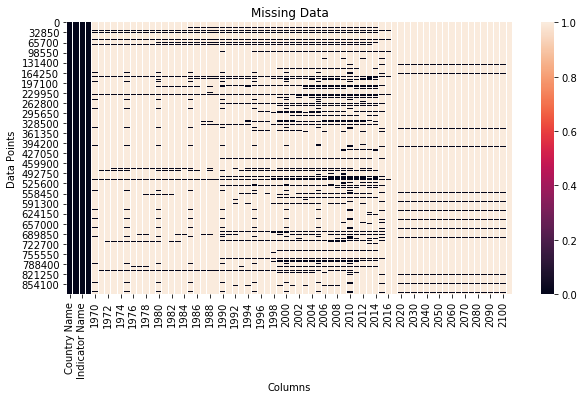

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(), ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

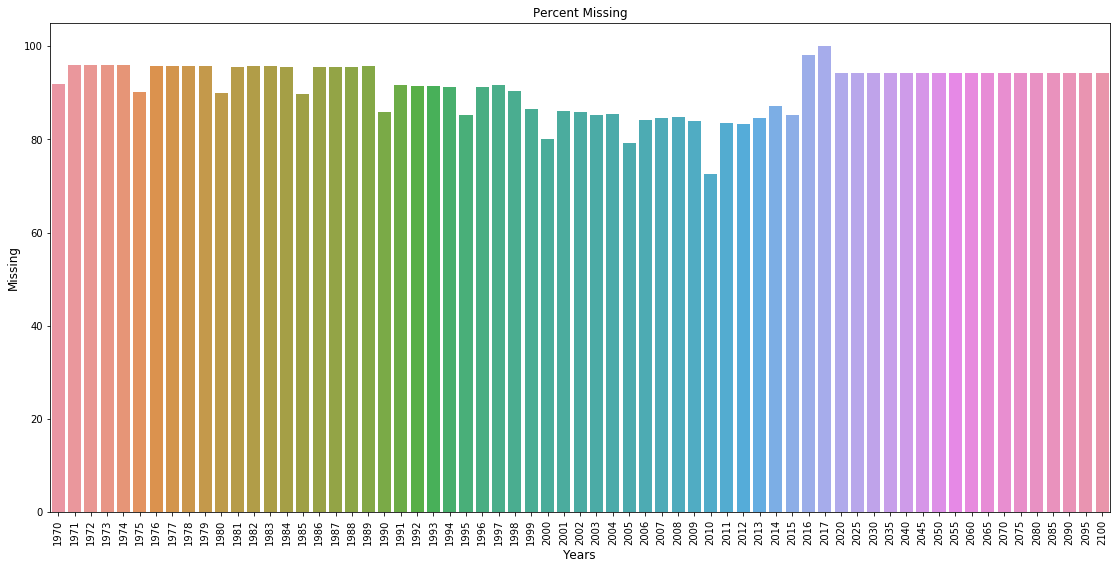

In [8]:
modobj = obj.drop([obj.index[0] , obj.index[1] , obj.index[2] , obj.index[3] , obj.index[-1]])

fig = plt.figure(1, figsize=(19,9))
sns.barplot(modobj.index, modobj.values)
plt.xticks(rotation=60)
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.xticks(rotation=90)
plt.show()


## 3. Data Cleaning - Selection des indicateurs

On peut voir que l'on a beaucoup de valeurs manquantes ce qui est explique par le fait que tout les couples indicateur/pays sont affiches mais beaucoup n'ont pas de donnees releves.

Avant de process ces datas manquantes il parait judicieux etant donne la taille du dataset et la problematique de l'etude de porter l'analyse sur une selection d'annees recentes en minimisant le nombre de donnees manquantes. 

Au vue des donnees ci dessus, j'ai pris la decision dans un premier temps de reduire l'etude sur les donnees des annees 1990 a 2015 en me focalisant sur 2015 qui est le compromis entre donnees recentes et donnees manquantes.

L'objectif est maintenant d'evaluer la pertinence de chaque indicateur par rapport a l'ensemble des pays, en effet comme on l'a vu il y a de nombreuses valeurs manquantes il faut donc minimiser les indicateurs ou seuls quelques pays sont evalues. Je fais donc le choix de garder les indicateurs ou plus de 40% de pays etudies sont renseignes.

Pour cette analyse, etant donne la taille du dataset et afin de limiter les temps de process j'utilise un echantillon equivalent a 10% du dataset 

##### EdStatsData - Echantillonage du csv

In [9]:
f = 'EdStatsData.csv'
num_lines = sum(1 for l in open(f))
size = int(num_lines /10)
skip_idx = random.sample(range(1, num_lines), num_lines - size)

df_sample = pd.read_csv(f, skiprows=skip_idx)
df_sample2 = df_sample[["Country Name", "Country Code", "Indicator Name", "Indicator Code","2010", "2011", "2012", "2013", "2014", "2015"]]
                               

##### EdStatsData - Taux de renseignement de chaque indicateur (nb de pays renseignes en 2015 / nb de pays evalues en 2015)

In [10]:

#groupby.count pour avoir le nombre de pays evalues pour chaque annee
sample2_size = df_sample2.groupby("Indicator Code")["2015"].size().sort_values(ascending=False)

#groupby.count pour avoir le nombre de pays renseignes pour chaque annee
sample2_count = df_sample2.groupby("Indicator Code")["2015"].count().sort_values(ascending=False)

#Merge les deux groupby
df_sample3 = pd.merge(sample2_count, sample2_size, on="Indicator Code", suffixes=('_count', '_size'))

#Taux de renseignement par indicateur
df_sample3["2015_indicator_rate"] = df_sample3["2015_count"] / df_sample3["2015_size"]
df_sample3 = df_sample3.loc[df_sample3["2015_indicator_rate"] > 0.4]
df_sample3



,2015_count,2015_size,2015_indicator_rate
Indicator Code,,,
IT.NET.USER.P2,32,34,0.941176
SP.POP.AG10.TO.UN,31,40,0.775000
SP.POP.1217.FE.UN,30,38,0.789474
PRJ.ATT.2039.3.MF,29,35,0.828571
SP.POP.1564.FE.IN,29,35,0.828571
...,...,...,...
SP.POP.AG20.MA.UN,7,15,0.466667
PRJ.POP.2024.4.FE,7,14,0.500000
SP.PRE.TOTL.MA.IN,7,11,0.636364


J'ai donc reduit ma liste d'indicateurs a 651, je vais maintenant tenter de la reduire encore en me focalisant sur la problematique de l'etude et le scope de l'entreprise c'est a dire des contenus de formation en ligne pour un public de niveau lycée et universite. Je vais donc reduire ma liste d'indicateurs en appliquant les filtres suivants

Pour ce faire je vais etudier le dataset EdStatsSeries qui a comme datapoint chaque indicateur (3665). Pour chaque indicateur (Series Code), nous avons des colonnes le decrivant (Categorie, Description, Source, Unite de mesure, etc). 

Je viens donc reduire ce data set avec ma liste d'indicateur precedemment filtre.

##### EdStatsSeries - Data Header

In [11]:
dfseries.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### EdStatsSeries - Repartition des categories d'indicateurs

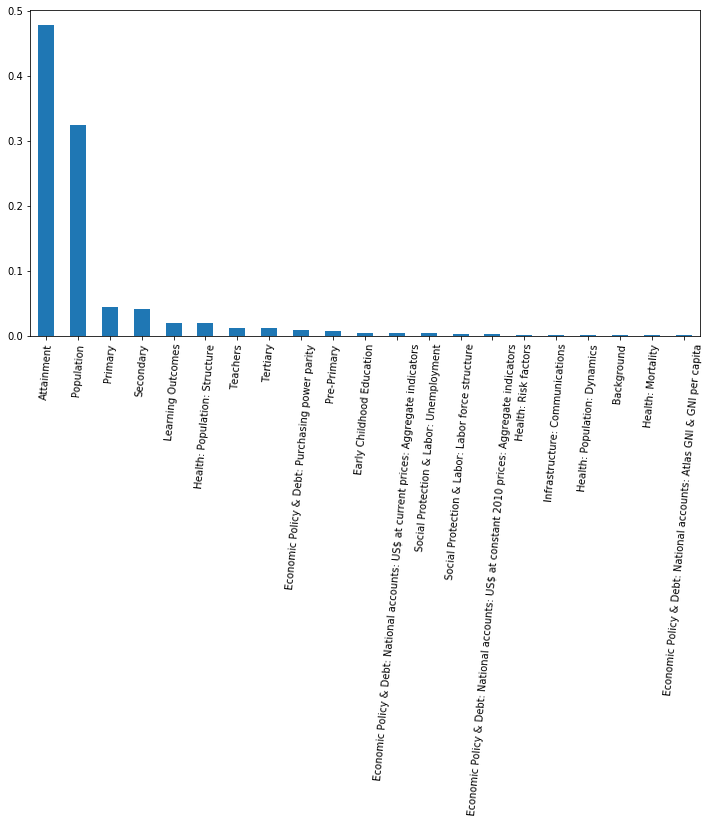

In [12]:
dfseries = dfseries.rename(columns={'Series Code': 'Indicator Code'})
dfseries_reduce = pd.merge(df_sample3, dfseries, on="Indicator Code")
##dfseries_reduce re.findall('\d*\.?\d+',s)
fig = plt.figure(1, figsize=(12,6))
dfseries_reduce["Topic"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=85)
plt.show()

##### EdStatsSeries - Cleaning avec les criteres lies a la problematique


In [13]:
searchfor = ['Primary', 'primary', 'lower secondary', 'Lower Secondary', 'Lower secondary', 'No Education', 'no education', 'No education']
dfseries_reduce = dfseries_reduce[~dfseries_reduce["Indicator Name"].str.contains('|'.join(searchfor))]

categ = ['Primary' , 'Teachers', 'Pre-Primary', 'Early Childhood Education', 'Social Protection & Labor: Labor force structure' , 'Social Protection & Labor: Unemployment']
dfseries_reduce = dfseries_reduce[~dfseries_reduce['Topic'].isin(categ)]

dfseries_reduce["age_inf"] = dfseries_reduce["Indicator Name"].str.extract(r'(?:age |ages |Age |Ages )(\d+)', expand=True)
dfseries_reduce["age_sup"] = dfseries_reduce["Indicator Name"].str.extract(r'(?:-)(\d+)', expand=True)

dfseries_reduce["age_inf"] = pd.to_numeric(dfseries_reduce["age_inf"], errors="coerce")
dfseries_reduce["age_sup"] = pd.to_numeric(dfseries_reduce["age_sup"], errors="coerce")

dfseries_filtered = dfseries_reduce[((dfseries_reduce['age_inf'] > 14) & (dfseries_reduce['age_inf'] < 30) & ((dfseries_reduce['age_sup'] < 30) & (dfseries_reduce['age_sup'] > 14) | pd.isnull(dfseries_reduce.age_sup)))| ((pd.isnull(dfseries_reduce.age_sup)) & (pd.isnull(dfseries_reduce.age_inf)))]
dfseries_filtered.info()
#dfseries_filtered.to_csv("dfseries_reduce.csv",index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 643
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Indicator Code                       188 non-null    object 
 1   2015_count                           188 non-null    int64  
 2   2015_size                            188 non-null    int64  
 3   2015_indicator_rate                  188 non-null    float64
 4   Topic                                188 non-null    object 
 5   Indicator Name                       188 non-null    object 
 6   Short definition                     24 non-null     object 
 7   Long definition                      188 non-null    object 
 8   Unit of measure                      0 non-null      float64
 9   Periodicity                          41 non-null     object 
 10  Base Period                          81 non-null     object 
 11  Other notes                     

Je viens donc reduire la liste d'indicateurs a l'aide des mots cles qui ne nous interesses pas, comme le niveau niveau scolaire hors Lycee et unniversite ou la tranche d'age.

A l'aide de ce tri, je reduis ma liste d'indicateurs a 184 indicateurs et je vais maintenant pouvoir proceder a un tri plus manuel afin de ne garder que 21 indicateurs que j'estime etre les plus pertinents pour l'etude et la problematique metier.

###### EdStatsSeries - Choix manuel de la liste d'indicateurs

In [14]:
indicator = ['IT.NET.USER.P2',
'SE.COM.DURS',
'SP.POP.1524.TO.UN',
'SP.POP.TOTL',
'PRJ.MYS.2024.MF',
'PRJ.MYS.2529.MF',
'NY.GDP.MKTP.KD',
'NY.GDP.PCAP.KD',
'NY.GNP.MKTP.CD',
'SP.SEC.TOTL.IN',
'SP.SEC.UTOT.IN',
'SP.TER.TOTL.IN',
'SP.POP.GROW',
'PRJ.POP.2024.4.MF',
'PRJ.POP.2529.4.MF',
'PRJ.POP.2024.3.MF',
'PRJ.POP.2529.3.MF',
'PRJ.ATT.2024.3.MF',
'PRJ.ATT.2529.3.MF',
'PRJ.ATT.2024.4.MF',
'PRJ.ATT.2529.4.MF']
dfseries_filtered = dfseries_filtered[dfseries_filtered['Indicator Code'].isin(indicator)]

indicator_proj = ['PRJ.POP.2024.4.MF',
'PRJ.POP.2529.4.MF',
'PRJ.POP.2024.3.MF',
'PRJ.POP.2529.3.MF',
'PRJ.ATT.2024.3.MF',
'PRJ.ATT.2529.3.MF',
'PRJ.ATT.2024.4.MF',
'PRJ.ATT.2529.4.MF']
dfseries_filtered_proj = dfseries_filtered[dfseries_filtered['Indicator Code'].isin(indicator_proj)]

dfseries_filtered
#dfseries_filtered.to_csv("dfseries_reduce.csv",index=False)

,Indicator Code,2015_count,2015_size,2015_indicator_rate,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,...,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,age_inf,age_sup
0,IT.NET.USER.P2,32,34,0.941176,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NY.GDP.MKTP.KD,26,29,0.896552,Economic Policy & Debt: National accounts: US$...,GDP (constant 2010 US$),NaN,GDP at purchaser's prices is the sum of gross ...,NaN,Annual,...,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,SP.POP.GROW,25,26,0.961538,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...,NaN,Annual,...,Derived from total population. Population sour...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,PRJ.ATT.2024.4.MF,24,30,0.800000,Attainment,Projection: Percentage of the population age 2...,NaN,Share of the population of the stated age grou...,NaN,NaN,...,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,24.0
51,NY.GDP.PCAP.KD,24,26,0.923077,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2010 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,...,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,SP.SEC.TOTL.IN,23,27,0.851852,Population,Population of the official age for secondary e...,NaN,Population of the age-group theoretically corr...,NaN,NaN,...,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,SP.POP.1524.TO.UN,22,25,0.880000,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...","Population, ages 15-24, total is the total pop...",NaN,NaN,...,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,24.0
94,SP.SEC.UTOT.IN,22,26,0.846154,Population,Population of the official age for upper secon...,NaN,Population of the age-group theoretically corr...,NaN,NaN,...,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,PRJ.ATT.2529.3.MF,21,26,0.807692,Attainment,Projection: Percentage of the population age 2...,NaN,Share of the population of the stated age grou...,NaN,NaN,...,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,29.0
157,PRJ.POP.2024.4.MF,20,29,0.689655,Attainment,Projection: Population age 20-24 in thousands ...,NaN,Total population in thousands in the specified...,NaN,NaN,...,Wittgenstein Centre for Demography and Global ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,24.0


##  4.  Data Cleaning - Cleaning des pays non-relevant (EdStatsData)


In [15]:
#df = df.drop(['Indicator Name'], axis=1)
df_filtered = pd.merge(df, dfseries_filtered, how='inner', on="Indicator Code")
df_filtered = pd.merge(df_filtered, dfcountrytable, how='right', on="Country Code")

df_years = df_filtered.loc[:, '1990':'2015']
df_desc = df_filtered.reindex(columns = ["Region", "Country Name", "Country Code", "Indicator Code"])
df_filtered = pd.concat([df_desc, df_years], axis=1)

country_size = df_filtered.groupby("Country Code")["2015"].size().sort_values(ascending=False)
country_count = df_filtered.groupby("Country Code")["2015"].count().sort_values(ascending=False)

df_country = pd.merge(country_count, country_size, on = "Country Code", suffixes=('_count', '_size'))
df_country["country_fillingrate"] = df_country["2015_count"] / df_country["2015_size"]
df_country = pd.merge(df_country, dfcountrytable, how='left', on="Country Code")
df_country_to_remove = df_country.loc[df_country["country_fillingrate"] > 0.8]
country_to_keep = df_country_to_remove['Country Code'].tolist()

mask = df_filtered["Country Code"].isin(country_to_keep)
df_filtered = df_filtered[mask]
df_filtered.describe(include= ['object'])
df_filtered


,Region,Country Name,Country Code,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
504,NaN,World,WLD,SE.COM.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,World,WLD,NY.GDP.MKTP.KD,3.789449e+13,3.843575e+13,3.912226e+13,3.975933e+13,4.095581e+13,4.220349e+13,...,6.062007e+13,6.319662e+13,6.434588e+13,6.322749e+13,6.595453e+13,6.804786e+13,6.970997e+13,7.154517e+13,7.355818e+13,7.563675e+13
506,NaN,World,WLD,NY.GDP.PCAP.KD,7.170351e+03,7.154726e+03,7.170317e+03,7.175381e+03,7.281240e+03,7.391469e+03,...,9.187057e+03,9.459972e+03,9.513350e+03,9.234045e+03,9.516347e+03,9.703319e+03,9.821901e+03,9.960541e+03,1.011946e+04,1.028341e+04
507,NaN,World,WLD,NY.GNP.MKTP.CD,2.247051e+13,2.378613e+13,2.526216e+13,2.569082e+13,2.760607e+13,3.066217e+13,...,5.152718e+13,5.780135e+13,6.318613e+13,5.999861e+13,6.591538e+13,7.327071e+13,7.507339e+13,7.703131e+13,7.929094e+13,7.495258e+13
508,NaN,World,WLD,IT.NET.USER.P2,4.968744e-02,NaN,NaN,2.535430e-01,4.499744e-01,7.823278e-01,...,1.758108e+01,2.051262e+01,2.306703e+01,2.548700e+01,2.885405e+01,3.127552e+01,3.434097e+01,3.688530e+01,3.993870e+01,4.319846e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,Sub-Saharan Africa,Zimbabwe,ZWE,PRJ.ATT.2529.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.400000e-01,NaN,NaN,NaN,NaN,6.000000e-01
5057,Sub-Saharan Africa,Zimbabwe,ZWE,PRJ.POP.2024.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.592000e+01,NaN,NaN,NaN,NaN,4.934000e+01
5058,Sub-Saharan Africa,Zimbabwe,ZWE,PRJ.POP.2024.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.839200e+02,NaN,NaN,NaN,NaN,9.144700e+02
5059,Sub-Saharan Africa,Zimbabwe,ZWE,PRJ.POP.2529.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.671000e+01,NaN,NaN,NaN,NaN,9.003000e+01


Sur le meme principe que le cleaning avec les indicateurs au debut je viens nettoyer ma liste de pays afin de supprimer les "petits pays" qui ont peu de potentiel et de data rensneignees.
Ce cleaning permet la reduction de ma liste de pays de 242 a 161 pays. 

## 5.  Preparation des données

##### a) Preparation du dataset "trend" 1990-2015"

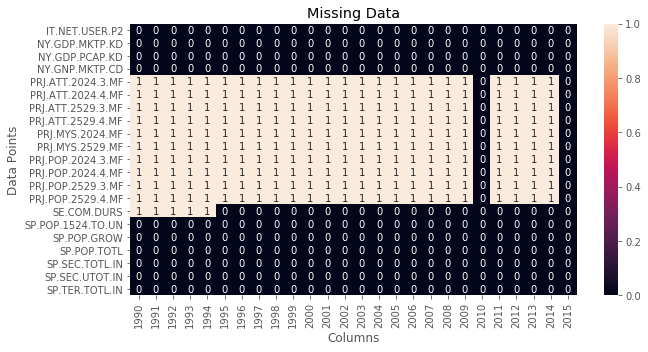

In [81]:
df_heatmap = df_filtered.drop(columns=['Region', 'Country Name', 'Country Code'])
group_indic = df_heatmap.groupby(['Indicator Code']).mean()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(group_indic.isnull(), annot = True, ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

In [17]:
df_years = df_filtered.loc[:, '1990':'2015']
df_desc = df_filtered.reindex(columns = ["Region", "Country Name", "Country Code", "Indicator Code"])

In [18]:
# Interpolation sur les années
df_years.interpolate(method="linear", axis=1, limit=5, limit_direction="both", inplace=True)

In [19]:
df_filtered_interpolate = pd.concat([df_desc, df_years], axis=1)

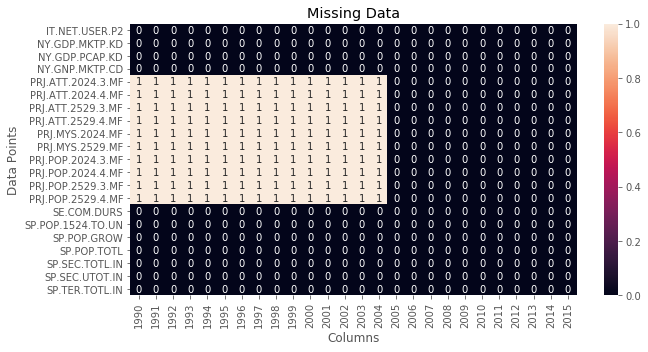

In [82]:
df_heatmap = df_filtered_interpolate.drop(columns=['Region', 'Country Name', 'Country Code'])
group_indic = df_heatmap.groupby(['Indicator Code']).mean()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(group_indic.isnull(), annot = True, ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

##### Show Data Header

In [21]:
df_filtered.head(3)

,Region,Country Name,Country Code,Indicator Code,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
504,NaN,World,WLD,SE.COM.DURS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,World,WLD,NY.GDP.MKTP.KD,3.789449e+13,3.843575e+13,3.912226e+13,3.975933e+13,4.095581e+13,4.220349e+13,...,6.062007e+13,6.319662e+13,6.434588e+13,6.322749e+13,6.595453e+13,6.804786e+13,6.970997e+13,7.154517e+13,7.355818e+13,7.563675e+13
506,NaN,World,WLD,NY.GDP.PCAP.KD,7.170351e+03,7.154726e+03,7.170317e+03,7.175381e+03,7.281240e+03,7.391469e+03,...,9.187057e+03,9.459972e+03,9.513350e+03,9.234045e+03,9.516347e+03,9.703319e+03,9.821901e+03,9.960541e+03,1.011946e+04,1.028341e+04


##### Show Data Info

In [22]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3465 entries, 504 to 5060
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          3444 non-null   object 
 1   Country Name    3465 non-null   object 
 2   Country Code    3465 non-null   object 
 3   Indicator Code  3465 non-null   object 
 4   1990            1558 non-null   float64
 5   1991            1431 non-null   float64
 6   1992            1446 non-null   float64
 7   1993            1466 non-null   float64
 8   1994            1494 non-null   float64
 9   1995            1554 non-null   float64
 10  1996            1583 non-null   float64
 11  1997            1605 non-null   float64
 12  1998            1731 non-null   float64
 13  1999            1748 non-null   float64
 14  2000            1754 non-null   float64
 15  2001            1765 non-null   float64
 16  2002            1767 non-null   float64
 17  2003            1763 non-null  

In [23]:
df_filtered.to_csv("df_filtered.csv",index=False)

##### b) Preparation du dataset sur l'annee 2015

In [24]:
df_filtered_pivot = df_filtered.pivot(index= "Country Code", columns = "Indicator Code", values = "2015")
df_filtered_pivot = pd.merge(dfcountrytable, df_filtered_pivot, how='right', on="Country Code")
pd.set_option('display.max_columns', None)
df_filtered_pivot

,Country Code,Short Name,Region,Income Group,IT.NET.USER.P2,NY.GDP.MKTP.KD,NY.GDP.PCAP.KD,NY.GNP.MKTP.CD,PRJ.ATT.2024.3.MF,PRJ.ATT.2024.4.MF,PRJ.ATT.2529.3.MF,PRJ.ATT.2529.4.MF,PRJ.MYS.2024.MF,PRJ.MYS.2529.MF,PRJ.POP.2024.3.MF,PRJ.POP.2024.4.MF,PRJ.POP.2529.3.MF,PRJ.POP.2529.4.MF,SE.COM.DURS,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,88.661227,NaN,NaN,NaN,0.35,0.08,0.11,0.31,9.3,10.1,3.12,0.73,0.88,2.44,13.0,14455.0,0.524658,1.043410e+05,7408.0,4492.0,7634.0
1,ALB,Albania,Europe & Central Asia,Upper middle income,63.252933,1.303516e+10,4524.990993,1.122583e+10,0.37,0.05,0.49,0.10,9.8,10.6,101.93,14.96,150.33,29.60,9.0,556269.0,-0.291206,2.880703e+06,329011.0,156541.0,276247.0
2,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,90.500000,3.676327e+11,40159.557876,3.596919e+11,0.51,0.10,0.40,0.19,10.6,10.9,328.98,65.59,420.15,201.50,6.0,743608.0,0.915608,9.154302e+06,525697.0,244592.0,NaN
3,ARG,Argentina,Latin America & Caribbean,Upper middle income,68.043064,4.554532e+11,10490.019568,5.735346e+11,0.54,0.06,0.45,0.16,10.5,11.1,1817.72,200.82,1470.64,525.37,14.0,6886530.0,1.009855,4.341776e+07,4204388.0,2067256.0,3450626.0
4,ARM,Armenia,Europe & Central Asia,Lower middle income,59.102378,1.147904e+10,3935.288772,1.099622e+10,0.74,0.16,0.68,0.26,10.4,10.9,186.06,40.90,198.29,75.68,12.0,446958.0,0.368528,2.916950e+06,271508.0,107475.0,242984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,WLD,World,NaN,NaN,43.198456,7.563675e+13,10283.410552,7.495258e+13,0.36,0.14,0.31,0.19,9.4,9.5,217717.41,81933.98,183216.61,112086.26,NaN,NaN,1.186331,7.355220e+09,757895040.0,380042048.0,595838464.0
161,WSM,Samoa,East Asia & Pacific,Lower middle income,25.407010,6.888241e+08,3555.056033,7.879856e+08,0.21,0.13,0.17,0.19,9.8,10.0,3.15,1.94,1.81,2.02,8.0,43855.0,0.761047,1.937590e+05,30597.0,21487.0,NaN
162,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,51.919116,4.183307e+11,7604.356691,3.097393e+11,0.43,0.03,0.44,0.05,10.3,10.4,2167.62,136.26,2214.49,229.89,9.0,9998431.0,1.585325,5.501198e+07,5233782.0,3184165.0,NaN
163,ZMB,Zambia,Sub-Saharan Africa,Lower middle income,21.000000,2.605812e+10,1618.457665,2.080748e+10,0.18,0.02,0.17,0.05,8.2,8.5,248.22,27.62,196.01,59.71,7.0,3068044.0,3.024123,1.610059e+07,1821221.0,1052490.0,NaN


In [25]:
#df_filtered_pivot["SP.POP.AG16-24.TO.UN"] = df_filtered_pivot['SP.POP.AG16.TO.UN'] + df_filtered_pivot['SP.POP.AG17.TO.UN'] + df_filtered_pivot['SP.POP.AG18.TO.UN'] + df_filtered_pivot['SP.POP.AG19.TO.UN'] + df_filtered_pivot['SP.POP.AG20.TO.UN'] + df_filtered_pivot['SP.POP.AG21.TO.UN'] + df_filtered_pivot['SP.POP.AG22.TO.UN'] + df_filtered_pivot['SP.POP.AG23.TO.UN'] + df_filtered_pivot['SP.POP.AG24.TO.UN']
df_filtered_pivot["SP.POP.1524.TO.ZS"] = df_filtered_pivot["SP.POP.1524.TO.UN"] / df_filtered_pivot['SP.POP.TOTL'] #Taux de 16-24 dans la population total

df_filtered_pivot["PRJ.POP.2029.3.MF"] = (df_filtered_pivot["PRJ.POP.2024.3.MF"] + df_filtered_pivot["PRJ.POP.2529.3.MF"])*1000 #Taux des 20-29 ans ayant atteints le niveau secondaire sur la poupulation total
df_filtered_pivot["PRJ.POP.2029.4.MF"] = (df_filtered_pivot["PRJ.POP.2024.4.MF"] + df_filtered_pivot["PRJ.POP.2529.4.MF"])*1000 #Taux des 20-29 ans ayant atteints le niveau secondaire sur la population total

df_filtered_pivot["PRJ.ATT.2029.3.MF"] = (df_filtered_pivot["PRJ.ATT.2024.3.MF"] + df_filtered_pivot["PRJ.ATT.2529.3.MF"])/2 #Taux des 20-29 ans ayant atteints le niveau secondaire sur la poupulation total
df_filtered_pivot["PRJ.ATT.2029.4.MF"] = (df_filtered_pivot["PRJ.ATT.2024.4.MF"] + df_filtered_pivot["PRJ.ATT.2529.4.MF"])/2 #Taux des 20-29 ans ayant atteints le niveau secondaire sur la population total

df_filtered_pivot["PRJ.MYS.2029.MF"] = (df_filtered_pivot["PRJ.MYS.2024.MF"] + df_filtered_pivot["PRJ.MYS.2529.MF"])/2 #Taux des 20-29 ans ayant atteints le niveau secondaire sur la poupulation total


df_filtered_pivot = df_filtered_pivot.reindex(columns = ['Country Code',
'Short Name',
'Region',
'Income Group',                 
'IT.NET.USER.P2',
'SE.COM.DURS',
'SP.POP.1524.TO.UN',
'SP.POP.1524.TO.ZS', 
'SP.POP.TOTL',
'PRJ.MYS.2029.MF',
'NY.GDP.MKTP.KD',
'NY.GDP.PCAP.KD',
'NY.GNP.MKTP.CD',
'SP.SEC.TOTL.IN',
'SP.SEC.UTOT.IN',
'SP.TER.TOTL.IN',
'SP.POP.GROW',
'PRJ.POP.2029.3.MF',
'PRJ.POP.2029.4.MF',
'PRJ.ATT.2029.3.MF',
'PRJ.ATT.2029.4.MF'])

##### Show Data Header

In [26]:
df_filtered_pivot.head(3)

,Country Code,Short Name,Region,Income Group,IT.NET.USER.P2,SE.COM.DURS,SP.POP.1524.TO.UN,SP.POP.1524.TO.ZS,SP.POP.TOTL,PRJ.MYS.2029.MF,NY.GDP.MKTP.KD,NY.GDP.PCAP.KD,NY.GNP.MKTP.CD,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,SP.POP.GROW,PRJ.POP.2029.3.MF,PRJ.POP.2029.4.MF,PRJ.ATT.2029.3.MF,PRJ.ATT.2029.4.MF
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,88.661227,13.0,14455.0,0.138536,104341.0,9.70,NaN,NaN,NaN,7408.0,4492.0,7634.0,0.524658,4000.0,3170.0,0.230,0.195
1,ALB,Albania,Europe & Central Asia,Upper middle income,63.252933,9.0,556269.0,0.193102,2880703.0,10.20,1.303516e+10,4524.990993,1.122583e+10,329011.0,156541.0,276247.0,-0.291206,252260.0,44560.0,0.430,0.075
2,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD,90.500000,6.0,743608.0,0.081230,9154302.0,10.75,3.676327e+11,40159.557876,3.596919e+11,525697.0,244592.0,NaN,0.915608,749130.0,267090.0,0.455,0.145


##### Show Data Info

In [27]:
df_filtered_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       165 non-null    object 
 1   Short Name         165 non-null    object 
 2   Region             164 non-null    object 
 3   Income Group       164 non-null    object 
 4   IT.NET.USER.P2     165 non-null    float64
 5   SE.COM.DURS        156 non-null    float64
 6   SP.POP.1524.TO.UN  161 non-null    float64
 7   SP.POP.1524.TO.ZS  161 non-null    float64
 8   SP.POP.TOTL        165 non-null    float64
 9   PRJ.MYS.2029.MF    165 non-null    float64
 10  NY.GDP.MKTP.KD     160 non-null    float64
 11  NY.GDP.PCAP.KD     160 non-null    float64
 12  NY.GNP.MKTP.CD     159 non-null    float64
 13  SP.SEC.TOTL.IN     162 non-null    float64
 14  SP.SEC.UTOT.IN     162 non-null    float64
 15  SP.TER.TOTL.IN     111 non-null    float64
 16  SP.POP.GROW        165 non

##### Fix Column Name
De nombreuses colonnes du dataset ont des noms codifies, nous les modifierons pour qu'ils soient plus simples et plus descriptifs.

In [28]:
df_filtered_pivot.columns = (["countrycode","country","region","incomegroup","accessinternet_pc","instruction_obligatoire","population_1624","population_pc_1624","population",
                  "scolarisation_moyenne_2029","GDP","GDP_capita","GNI","population_secondary","population_uppersecondary","population_tertiary","croissance_population","diplome_2029_secondary","diplome_2029_tertiary",
                  "diplome_pc_2029_secondary","diplome_pc_2029_tertiary"])

##### Analyste Statistique du dataset
Montrons les valeurs min, max, moyenne, medianne et le count de chaque colonne du dataset

In [29]:
df_filtered_pivot.describe()

,accessinternet_pc,instruction_obligatoire,population_1624,population_pc_1624,population,scolarisation_moyenne_2029,GDP,GDP_capita,GNI,population_secondary,population_uppersecondary,population_tertiary,croissance_population,diplome_2029_secondary,diplome_2029_tertiary,diplome_pc_2029_secondary,diplome_pc_2029_tertiary
count,165.000000,156.000000,1.610000e+02,161.000000,1.650000e+02,165.000000,1.600000e+02,160.000000,1.590000e+02,1.620000e+02,1.620000e+02,1.110000e+02,165.000000,1.650000e+02,1.650000e+02,165.000000,165.000000
mean,48.789539,9.570513,7.243762e+06,0.164289,8.766361e+07,9.897273,9.349212e+11,14262.835877,9.314731e+11,9.163225e+06,4.601050e+06,9.514401e+06,1.359336,4.801200e+06,2.326221e+06,0.362788,0.167727
std,28.041738,2.347579,2.542421e+07,0.042753,5.890919e+08,2.863289,6.162106e+12,19596.114103,6.173117e+12,6.131865e+07,3.096631e+07,5.811602e+07,1.218866,3.198963e+07,1.557391e+07,0.219342,0.138073
min,1.760000,5.000000,1.445500e+04,0.052136,1.043410e+05,2.150000,2.464598e+08,226.528058,3.148510e+08,7.408000e+03,3.962000e+03,7.634000e+03,-2.467847,3.390000e+03,1.100000e+02,0.010000,0.005000
25%,21.976068,8.000000,5.035290e+05,0.124036,2.976877e+06,7.900000,1.162988e+10,1685.662464,1.081162e+10,2.710460e+05,1.176982e+05,2.887840e+05,0.508137,1.133600e+05,3.429000e+04,0.175000,0.060000
50%,50.139318,9.000000,1.411616e+06,0.167887,9.799186e+06,10.500000,4.414746e+10,5834.969643,4.177612e+10,8.851340e+05,3.943425e+05,7.205350e+05,1.214308,4.189300e+05,1.628400e+05,0.345000,0.135000
75%,72.900000,11.000000,5.298036e+06,0.200146,3.137667e+07,12.050000,2.645003e+11,16955.475341,2.847521e+11,3.494388e+06,1.529404e+06,2.746984e+06,2.275440,1.677500e+06,6.605300e+05,0.525000,0.225000
max,98.200000,15.000000,2.441202e+08,0.258451,7.355220e+09,15.100000,7.563675e+13,107648.608008,7.495258e+13,7.578950e+08,3.800420e+08,5.958385e+08,4.412616,4.009340e+08,1.940202e+08,0.865000,0.805000


##### Valeurs manquantes

countrycode , 0.0
country , 0.0
region , 0.61
incomegroup , 0.61
accessinternet_pc , 0.0
instruction_obligatoire , 1.21
population_1624 , 2.42
population_pc_1624 , 2.42
population , 0.0
scolarisation_moyenne_2029 , 0.0
GDP , 3.0300000000000002
GDP_capita , 3.0300000000000002
GNI , 3.64
population_secondary , 1.82
population_uppersecondary , 1.82
croissance_population , 0.0
diplome_2029_secondary , 0.0
diplome_2029_tertiary , 0.0
diplome_pc_2029_secondary , 0.0
diplome_pc_2029_tertiary , 0.0


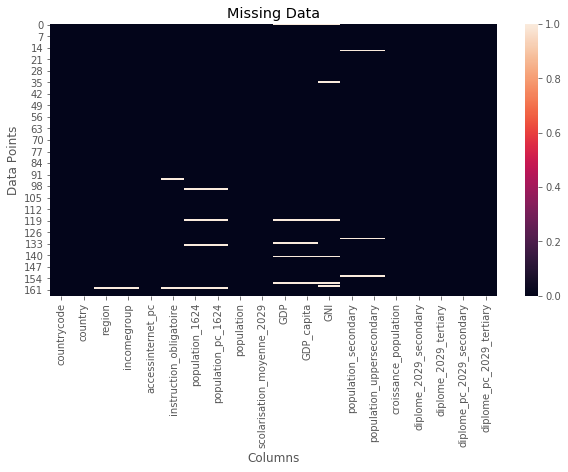

In [69]:
obj = df_filtered_pivot.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_filtered_pivot.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.xticks(rotation=45)
plt.show()

Nous pouvons voir ci dessus que nous avons quelques datapoint de données manquants, mais ce n'est pas étendu. 15/21 de nos colonnes comportent des données manquantes, le pourcentage maximum de données manquantes se trouve dans la colonne "population_tertiary", il est egal à 30%, je prend donc la decision de supprimer cet indicateur etant donne qu'interpoller sur autant de valeurs manquantes risque de poser probleme.
Le reste des colonnes est inferieur ou egal a 5% de datas manquantes. 

Nous allons maintenant nettoyer ces valeurs manquantes

##### Cleaning - Donnees manquantes

In [31]:
print(df_filtered_pivot.isnull().sum())

countrycode                    0
country                        0
region                         1
incomegroup                    1
accessinternet_pc              0
instruction_obligatoire        9
population_1624                4
population_pc_1624             4
population                     0
scolarisation_moyenne_2029     0
GDP                            5
GDP_capita                     5
GNI                            6
population_secondary           3
population_uppersecondary      3
population_tertiary           54
croissance_population          0
diplome_2029_secondary         0
diplome_2029_tertiary          0
diplome_pc_2029_secondary      0
diplome_pc_2029_tertiary       0
dtype: int64



- region & incomegroup : 1 data point manquant. Data point du pays "world", suppression de ce datapoint car non pertine nt pour la problematique d'etudier l'ensemble du monde
- instruction_obligatoire : 8 datas manquantes. On remplace par la moyenne de la region et de la categoire d'income du pays avec la donnees manquantes
- population_1624: 1 missing value.
- scolarisation_moyenne_2029: 
- GDP, GDP_capita, GNI  : 4 data manquantes, Remplacement par des valeurs trouves sur internet possible, mais etant des pays avec peu de potentiels, je decide de laisser les valeurs manquantes tel quel.
- population_uppersecondary : 3 data manquantes, Pas d'action
- population_secondary : 3 data manquantes, Pas d'action
- population_tertiary: 53 data manquantes, suppression de cette indicateur.


In [32]:
df_filtered_pivot = df_filtered_pivot.drop(['population_tertiary'], axis=1)
df_filtered_pivot['instruction_obligatoire'].fillna(df_filtered_pivot.groupby(['region','incomegroup'])['instruction_obligatoire'].transform('mean'), inplace= True)

Verifions maintenant nos donnees manquantes:

In [33]:
print(df_filtered_pivot.isnull().sum())

countrycode                   0
country                       0
region                        1
incomegroup                   1
accessinternet_pc             0
instruction_obligatoire       2
population_1624               4
population_pc_1624            4
population                    0
scolarisation_moyenne_2029    0
GDP                           5
GDP_capita                    5
GNI                           6
population_secondary          3
population_uppersecondary     3
croissance_population         0
diplome_2029_secondary        0
diplome_2029_tertiary         0
diplome_pc_2029_secondary     0
diplome_pc_2029_tertiary      0
dtype: int64


countrycode , 0.0
country , 0.0
region , 0.61
incomegroup , 0.61
accessinternet_pc , 0.0
instruction_obligatoire , 1.21
population_1624 , 2.42
population_pc_1624 , 2.42
population , 0.0
scolarisation_moyenne_2029 , 0.0
GDP , 3.0300000000000002
GDP_capita , 3.0300000000000002
GNI , 3.64
population_secondary , 1.82
population_uppersecondary , 1.82
croissance_population , 0.0
diplome_2029_secondary , 0.0
diplome_2029_tertiary , 0.0
diplome_pc_2029_secondary , 0.0
diplome_pc_2029_tertiary , 0.0


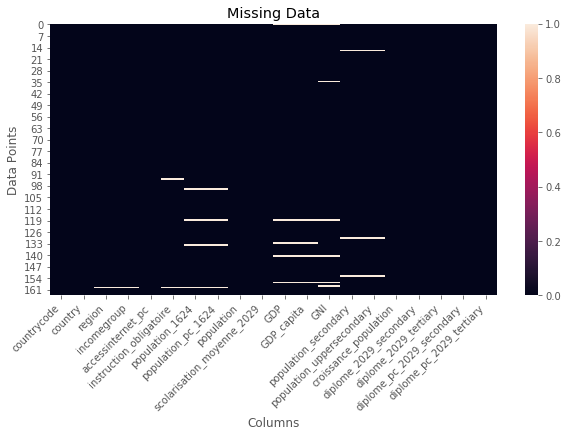

In [80]:
obj = df_filtered_pivot.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_filtered_pivot.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.xticks(rotation=45, ha = 'right')
plt.show()

##### a) Preparation du dataset "projection" 2015-2030"
Les indicateurs du dataset commencant par PRJ sont des projections qui ont ete faites, on va donc en profiter pour afficher pour ceux ci les donnees projetes par la banque mondiale.

In [35]:
indicator_proj = ['PRJ.POP.2024.4.MF',
'PRJ.POP.2529.4.MF',
'PRJ.POP.2024.3.MF',
'PRJ.POP.2529.3.MF',
'PRJ.ATT.2024.3.MF',
'PRJ.ATT.2529.3.MF',
'PRJ.ATT.2024.4.MF',
'PRJ.ATT.2529.4.MF']
dfseries_filtered_proj = dfseries_filtered[dfseries_filtered['Indicator Code'].isin(indicator_proj)]

df_filtered_proj = pd.merge(df, dfseries_filtered_proj, how='inner', on="Indicator Code")
df_filtered_proj = pd.merge(df_filtered_proj, dfcountrytable, how='right', on="Country Code")

df_filtered_proj = df_filtered_proj[["Region", "Country Name", "Country Code", "Indicator Code", "2015", "2020", "2025", "2030"]]

country_size = df_filtered_proj.groupby("Country Code")["2015"].size().sort_values(ascending=False)
country_count = df_filtered_proj.groupby("Country Code")["2015"].count().sort_values(ascending=False)

df_country = pd.merge(country_count, country_size, on = "Country Code", suffixes=('_count', '_size'))
df_country["country_fillingrate"] = df_country["2015_count"] / df_country["2015_size"]
df_country = pd.merge(df_country, dfcountrytable, how='left', on="Country Code")
df_country_to_remove = df_country.loc[df_country["country_fillingrate"] > 0.8]
country_to_keep = df_country_to_remove['Country Code'].tolist()

mask = df_filtered_proj["Country Code"].isin(country_to_keep)
df_filtered_proj = df_filtered_proj[mask]
df_filtered_proj.describe(include= ['object'])

,Region,Country Name,Country Code,Indicator Code
count,1328,1336,1336,1336
unique,7,167,167,8
top,Europe & Central Asia,Haiti,PHL,PRJ.ATT.2529.3.MF
freq,376,8,8,167


##### Show Data Header

In [36]:
df_filtered_proj.head(3)

,Region,Country Name,Country Code,Indicator Code,2015,2020,2025,2030
192,NaN,World,WLD,PRJ.ATT.2024.4.MF,0.14,0.15,0.16,0.17
193,NaN,World,WLD,PRJ.ATT.2024.3.MF,0.36,0.38,0.41,0.43
194,NaN,World,WLD,PRJ.ATT.2529.4.MF,0.19,0.20,0.22,0.23


##### Show Data Info

In [37]:
df_filtered_proj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 192 to 1927
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1328 non-null   object 
 1   Country Name    1336 non-null   object 
 2   Country Code    1336 non-null   object 
 3   Indicator Code  1336 non-null   object 
 4   2015            1336 non-null   float64
 5   2020            1336 non-null   float64
 6   2025            1336 non-null   float64
 7   2030            1336 non-null   float64
dtypes: float64(4), object(4)
memory usage: 93.9+ KB


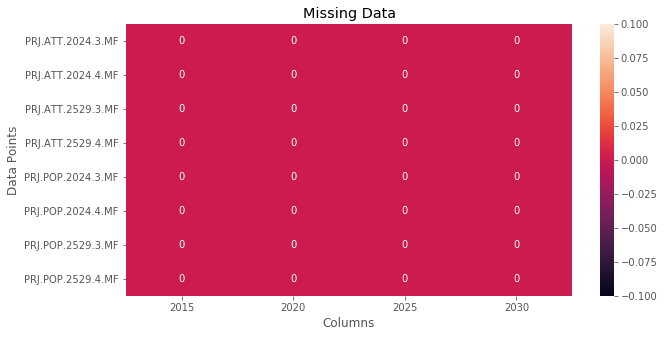

In [105]:
df_heatmap = df_filtered_proj.drop(columns=['Region', 'Country Name', 'Country Code'])
group_indic = df_heatmap.groupby(['Indicator Code']).mean()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(group_indic.isnull(), annot = True, ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

## 4. EDA
##### Correlation heatmap¶


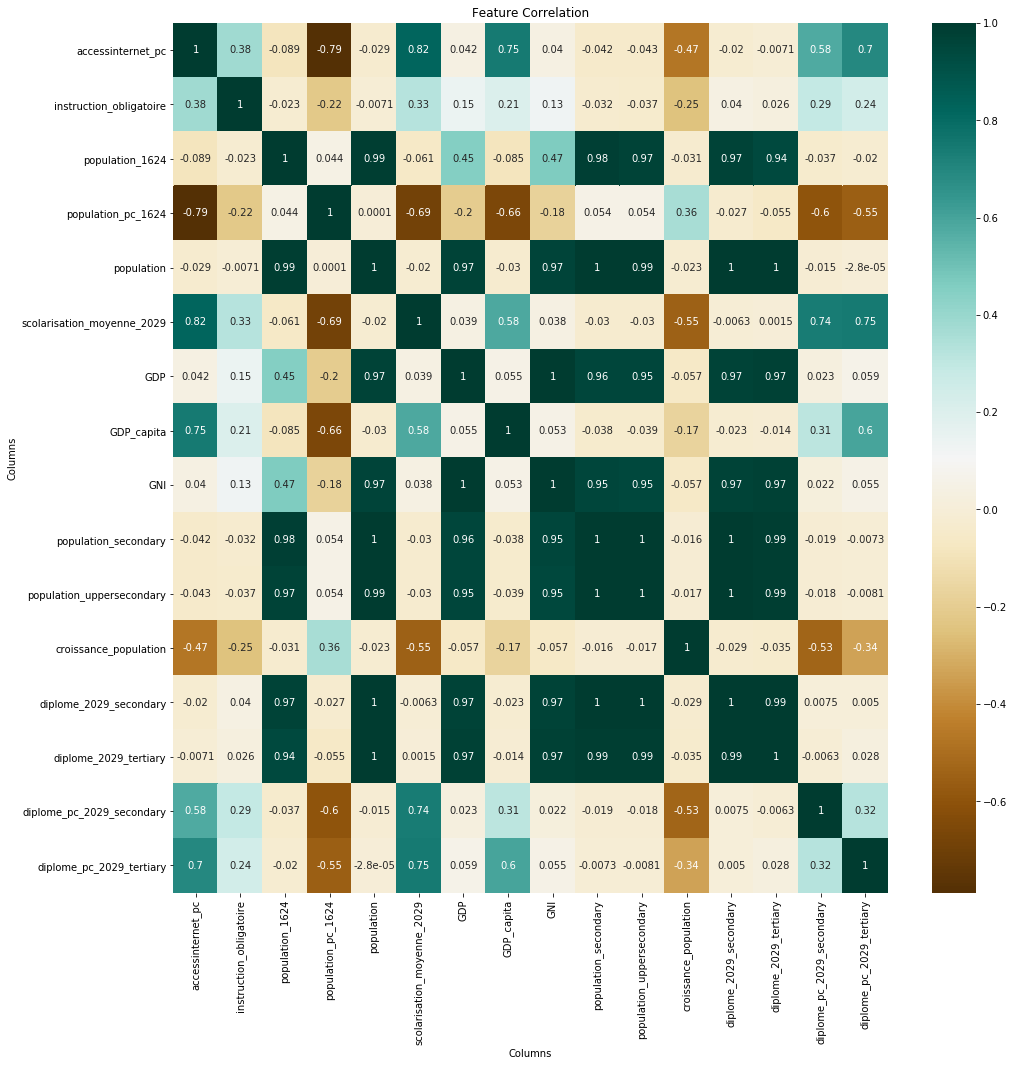

In [39]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_filtered_pivot.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Quelques insights de la correlation heatmap ci-dessus :

- Forte corrélation entre accessinternet_pc et GDP_capita / scolarisation_moyenne_2029 / diplome_pc_2029_tertiary, ce qui est logique car un pays avec un PIB par habitant élevé a tendance à avoir un meilleur accès à Internet et à avoir un meilleur système scolaire qui pousse les étudiants à faire des études plus longues.

- Forte correlation negative entre accessinternet_pc et population_pc_1624 explique potentiellement par le fait que les pays avec un fort acces a internet ont tendance a avoir des esperances de vie plus importantes et des population plus veillissante renforces avec les phenomenes de baby boom de ce fait les pays en voie de developpement ont tendance a avoir une part de population jeune plus importante etant donne que l'esperance de vie y est plus faible 

- Forte correlation entre les differents indicateurs de population, logique etant donne que plus la population total d'un pays est importante plus la population d'une tranche d'age le sera aussi

- Legere correlation entre le GDP et GNI et le nombre de diplomes d'etudes tertiaires.


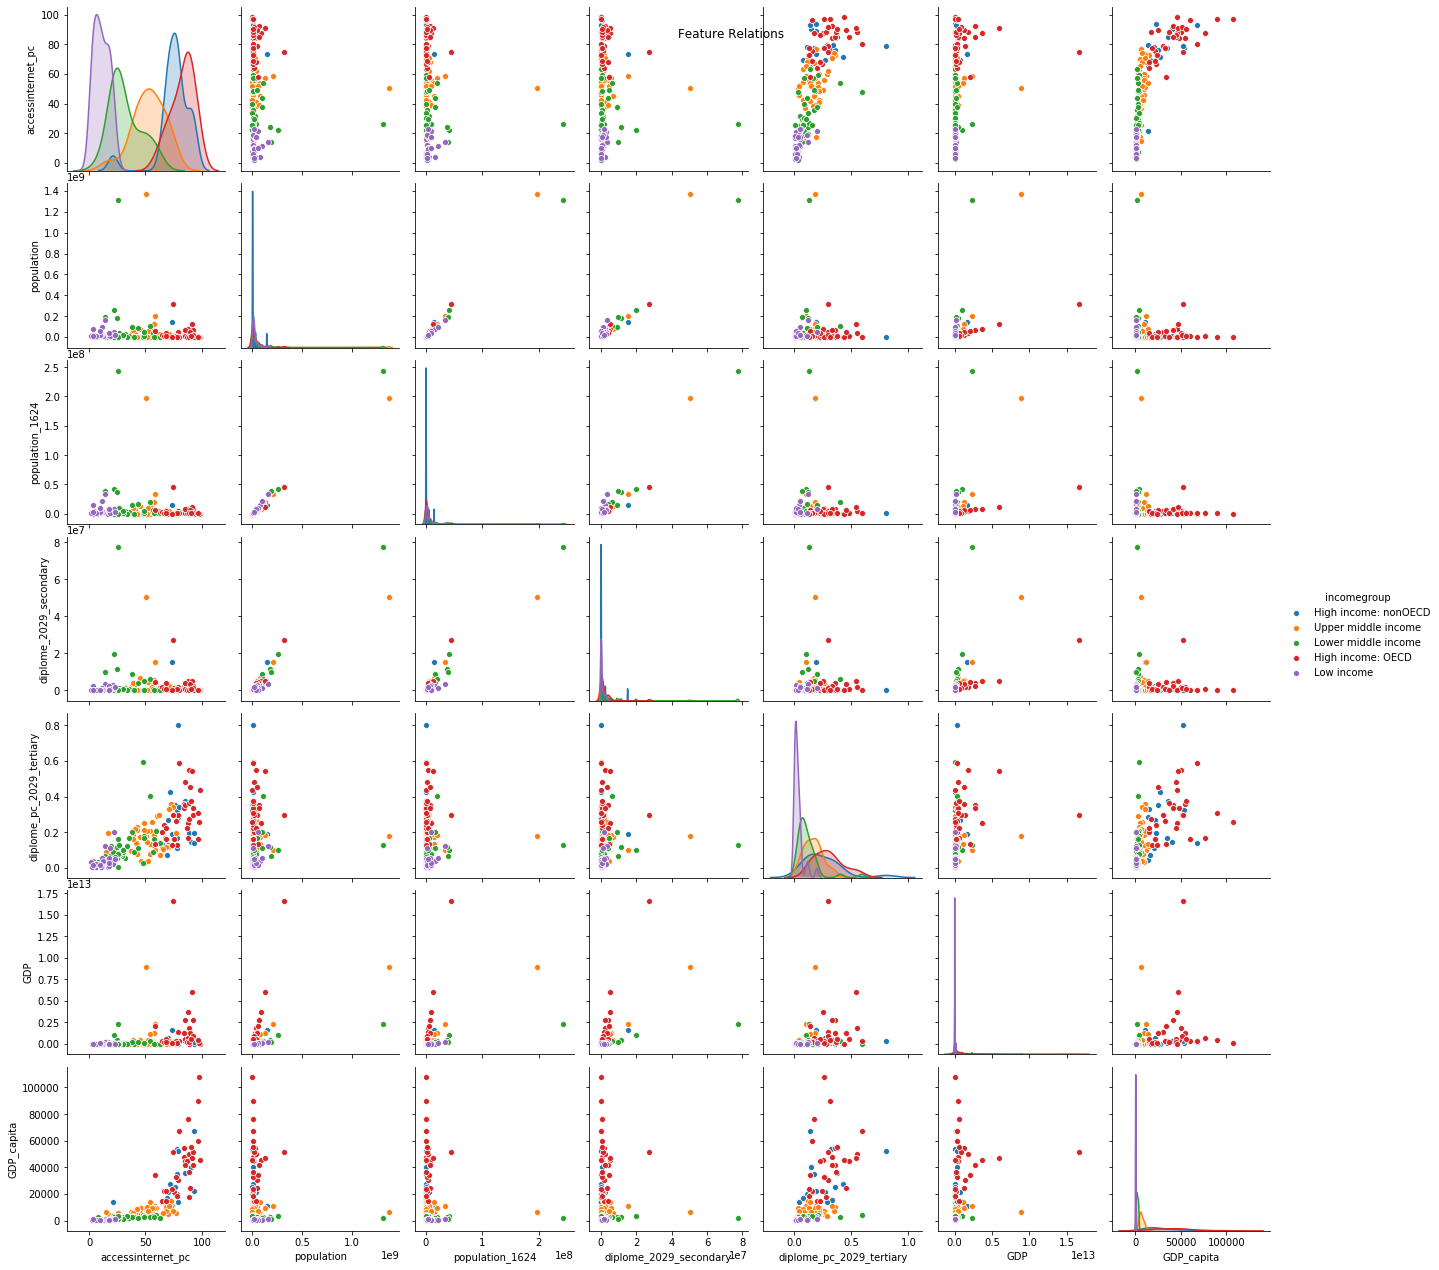

In [40]:
g = sns.pairplot(df_filtered_pivot, vars=["accessinternet_pc", "population", "population_1624","diplome_2029_secondary","diplome_pc_2029_tertiary","GDP", "GDP_capita"], hue = "incomegroup")
g.fig.suptitle('Feature Relations')
plt.show()

Les correlations sont confirmes via ce graph.

Je decide de regrouper les indicateurs par categorie afin de faire une analyse regionale des indicateurs et aisni mettre en evidence des ordres de grandeurs.

##### Analyse Regionale


In [41]:

indicateurs_it = ["accessinternet_pc"]

indicateurs_eco = ["GDP_capita", "GDP", "GNI"]

indicateurs_edu = ["instruction_obligatoire", "scolarisation_moyenne_2029"]
indicateurs_edu_pop = ["population_secondary", "population_uppersecondary", "diplome_2029_secondary", "diplome_2029_tertiary"]
indicateurs_edu_pc = ["diplome_pc_2029_secondary", "diplome_pc_2029_tertiary"]

indicateurs_pop = ["SP.POP.TOTL", "SP.POP.1524.TO.UN", "SP.POP.GROW"]


##### Indicateurs Internet

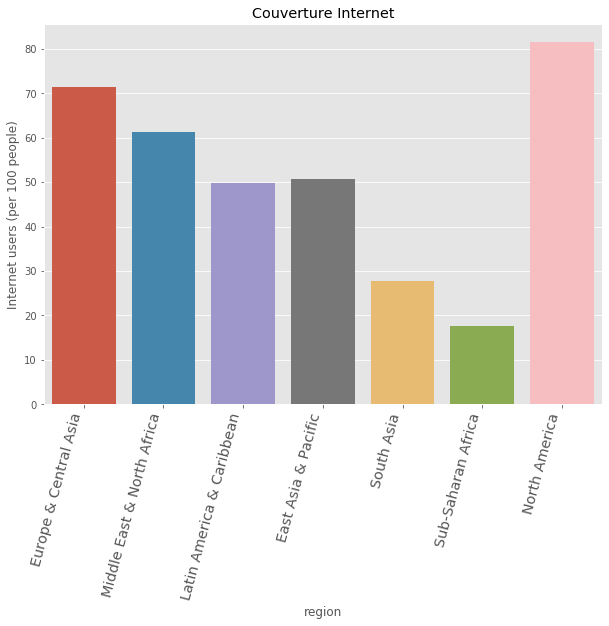

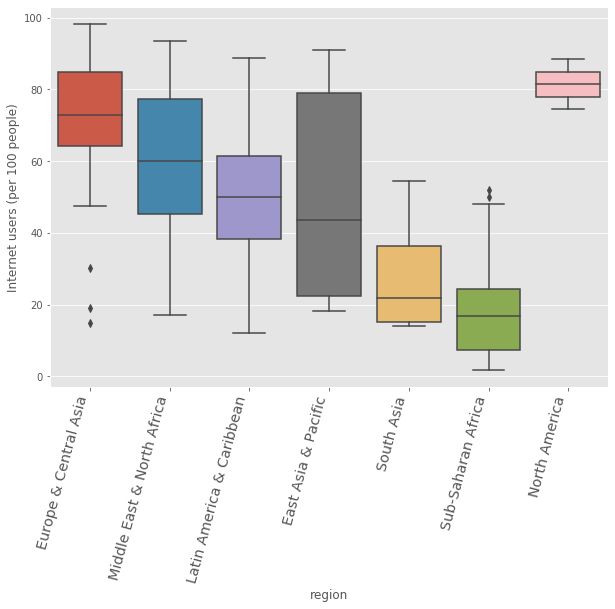

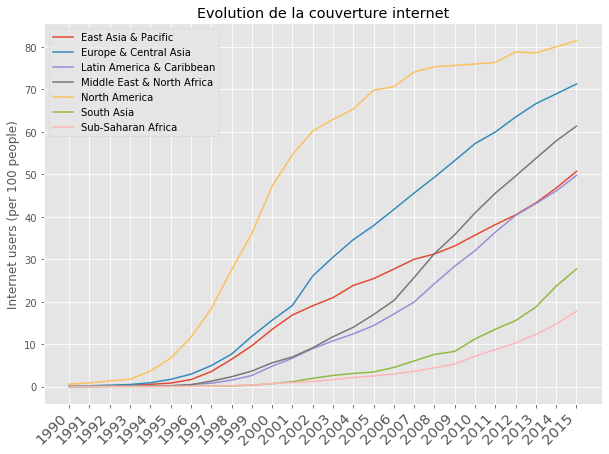

In [101]:
list_regions = df_filtered_interpolate["Region"].dropna().unique()
df_it = df_filtered_interpolate[df_filtered_interpolate["Indicator Code"] == "IT.NET.USER.P2"]

fig = plt.figure(1, figsize=(10,7))
sns.barplot(data= df_filtered_pivot, x= 'region', y= 'accessinternet_pc', ci= None, order=list_regions)
plt.xticks(rotation=75, ha = "right", size = 'x-large')
plt.title("Couverture Internet")
plt.ylabel("Internet users (per 100 people)")
plt.style.use('ggplot')
plt.show()

fig = plt.figure(1, figsize=(10,7))
sns.boxplot(data = df_filtered_pivot,  x = 'region', y = 'accessinternet_pc', order=list_regions)
plt.xticks(rotation=75, ha = "right", size = 'x-large')
plt.ylabel("Internet users (per 100 people)")
plt.style.use('ggplot')
plt.show()

# Série temporelle
fig = plt.figure(1, figsize=(10,7))
series = df_it.groupby("Region").mean()
for region in series.index :
    plt.plot(series.loc[region, :], label=region)
plt.legend()
plt.xticks(rotation=45, ha = "right", size = 'x-large')
plt.ylabel("Internet users (per 100 people)")
plt.title("Evolution de la couverture internet")
plt.legend()
plt.show()



Les régions ayant en moyenne plus accées a internet sont : 

- North America
- Europe and Central Asia 
- Middle East & North Africa 
- East Asia & Pacific

On note cependant qu'il y a de fortes inégalités entre régions géographiques mais également au sein d'une même région

##### Indicateurs Economique

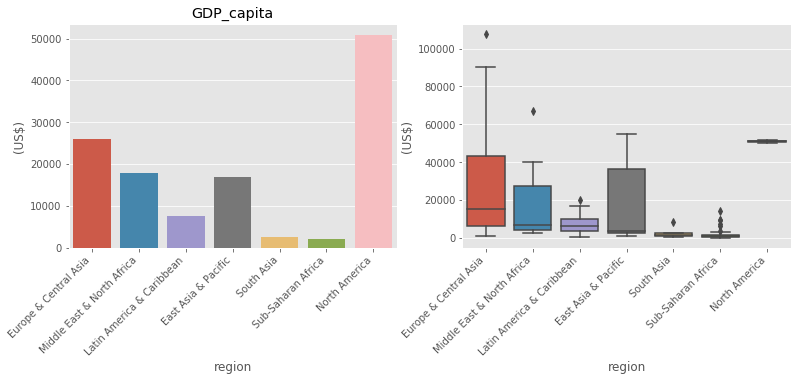

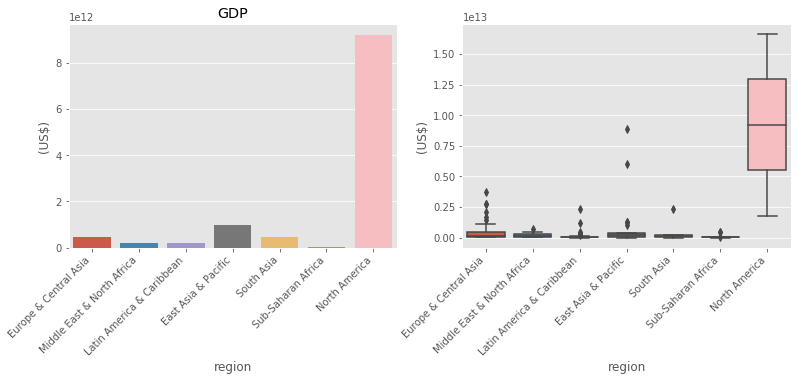

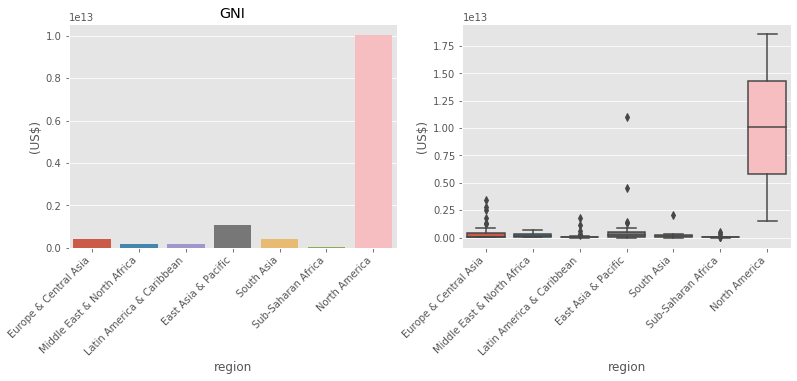

In [104]:
for indicateur in indicateurs_eco:
    fig = plt.figure(1, figsize=(20,14))
    #df_ind = df_filtered[df_filtered["Indicator Code"] == indicator]
    plt.subplot(331)
    sns.barplot(data = df_filtered_pivot,  x = 'region', y = indicateur, ci= None, order=list_regions)
    plt.title(indicateur)
    plt.xticks(rotation=45, ha = "right")
    plt.style.use('ggplot')
    plt.ylabel("(US$)")

    plt.subplot(332)
    sns.boxplot(data = df_filtered_pivot,  x = 'region', y = indicateur, order=list_regions)
    plt.xticks(rotation=45, ha = "right")
    plt.ylabel("(US$)")
    plt.show()

    # Série temporelle
    #plt.subplot(333)
    #series = df_ind.groupby("Region").mean()
    #for region in series.index :
        #plt.plot(series.loc[region, :], label=region)
    #plt.legend()
    #plt.ylabel("(US$)")
    #plt.xticks(rotation=45)
    #plt.show()

Les inégalités de PIB par habitant sont très marqués d'une région à l'autre

##### Indicateurs Population

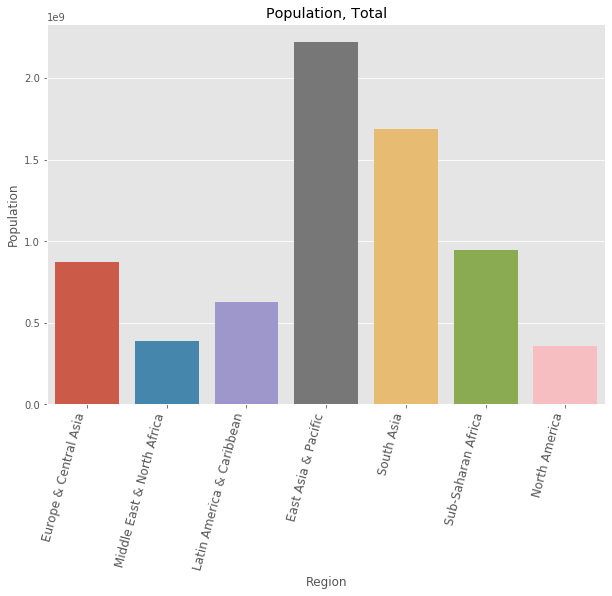

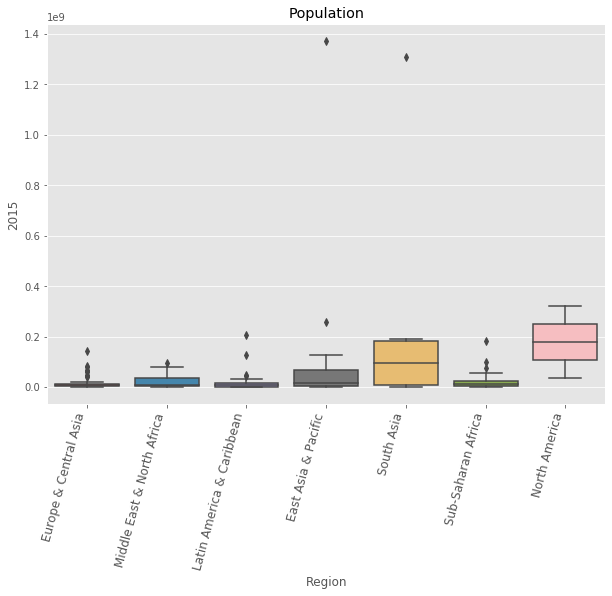

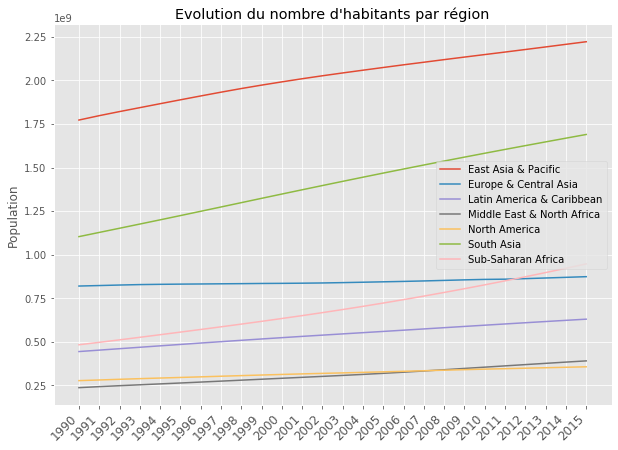

In [103]:

list_regions = df_filtered_interpolate["Region"].dropna().unique()
df_pop = df_filtered_interpolate[df_filtered_interpolate["Indicator Code"] == "SP.POP.TOTL"]
df_pop_plot = df_pop.groupby("Region").sum()["2015"]
fig = plt.figure(1, figsize=(10,7))
sns.barplot(df_pop_plot.index, df_pop_plot.values, order=list_regions)
plt.title("Population, Total")
plt.xticks(rotation=75, ha="right", size = 'large')
plt.ylabel("Population")
plt.style.use('ggplot')
plt.show()

# Boite à moustaches
fig = plt.figure(1, figsize=(10,7))
sns.boxplot(data=df_pop, y="2015", x="Region", showfliers=True, order=list_regions)
plt.xticks(rotation=75, ha="right", size = 'large')
plt.title("Population")
plt.show()
    
# Série temporelle
fig = plt.figure(1, figsize=(10,7))
series = df_pop.groupby("Region").sum()
for region in series.index :
    plt.plot(series.loc[region, :], label=region)
plt.legend()
plt.xticks(rotation=45, ha="right", size = 'large')
plt.ylabel("Population")
plt.title("Evolution du nombre d'habitants par région")
plt.legend()
plt.show()


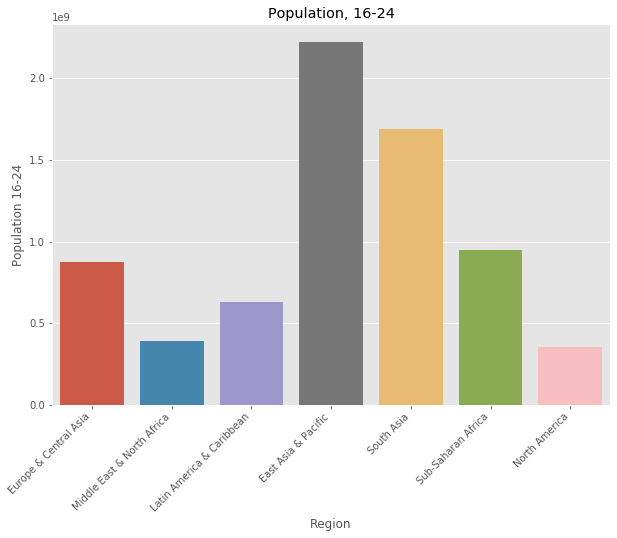

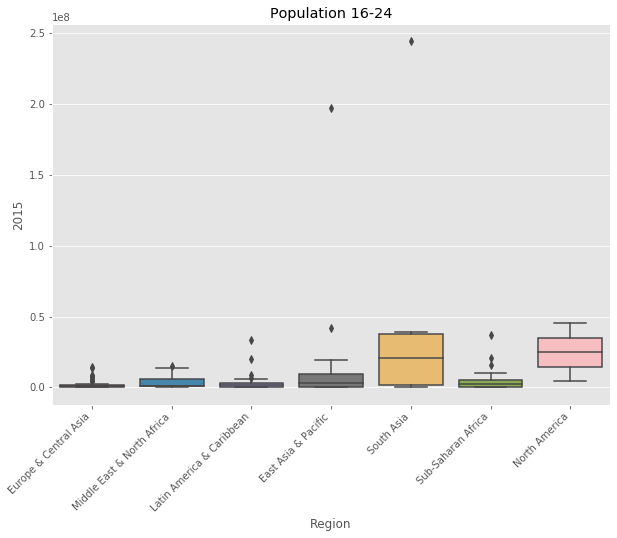

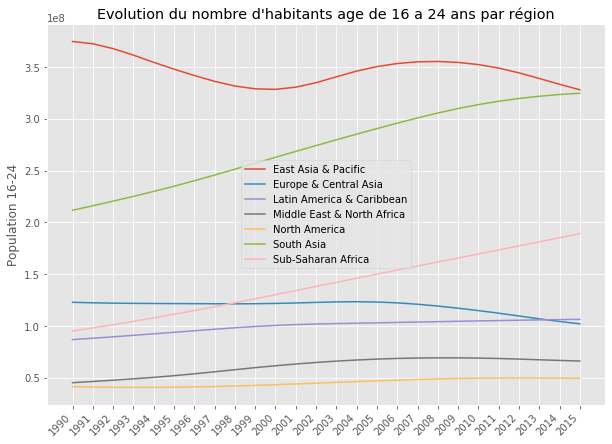

In [91]:
df_pop1624 = df_filtered_interpolate[df_filtered_interpolate["Indicator Code"] == "SP.POP.1524.TO.UN"]
df_pop1624_plot = df_pop.groupby("Region").sum()["2015"]
fig = plt.figure(1, figsize=(10,7))
sns.barplot(df_pop1624_plot.index, df_pop1624_plot.values, order=list_regions)
plt.title("Population, 16-24")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Population 16-24")
plt.style.use('ggplot')
plt.show()

# Boite à moustaches
fig = plt.figure(1, figsize=(10,7))
sns.boxplot(data=df_pop1624, y="2015", x="Region", showfliers=True, order=list_regions)
plt.xticks(rotation=45, ha="right")
plt.title("Population 16-24")
plt.show()
    
# Série temporelle
fig = plt.figure(1, figsize=(10,7))
series = df_pop1624.groupby("Region").sum()
for region in series.index :
    plt.plot(series.loc[region, :], label=region)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.ylabel("Population 16-24")
plt.title("Evolution du nombre d'habitants age de 16 a 24 ans par région")
plt.legend()
plt.show()

- La démographie des 16-24 ans par pays indique le nombre d'utilisateurs potentiels pour notre application
- Les 2 outliers présents sur le graphique des boxplots sont la Chine et l'Inde
- La population est très nombreuse en Asie du Sud et en Asie-Pacifique

##### Indicateurs Education

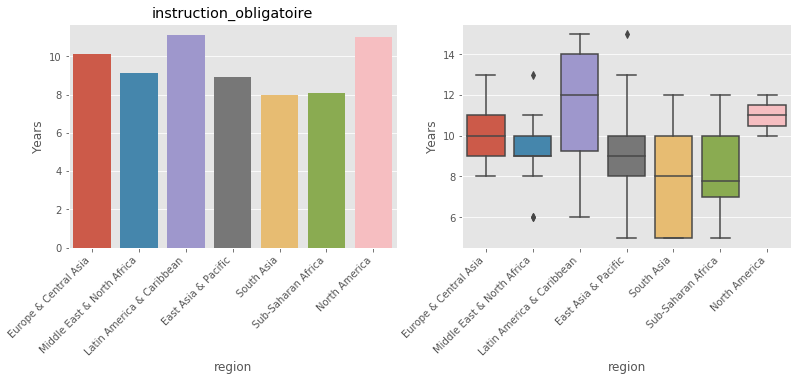

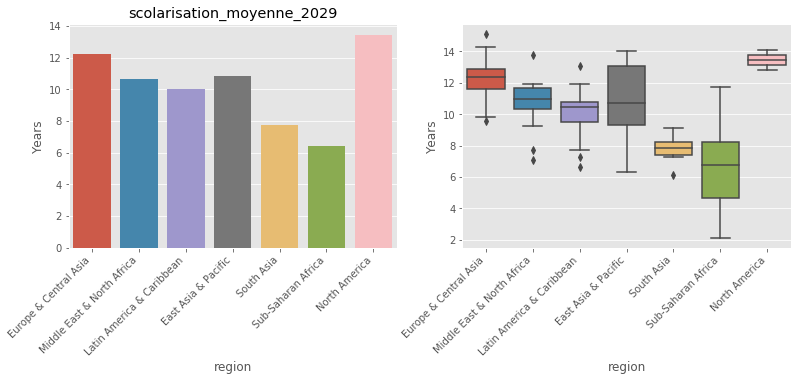

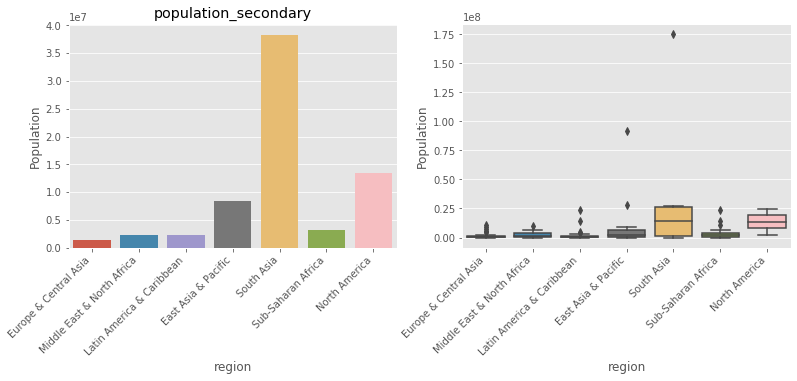

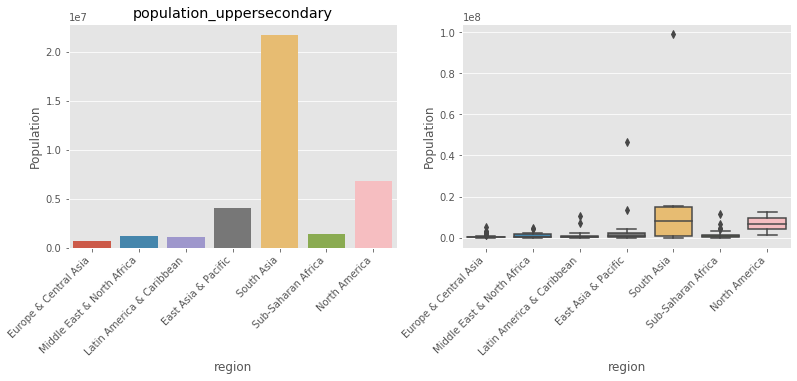

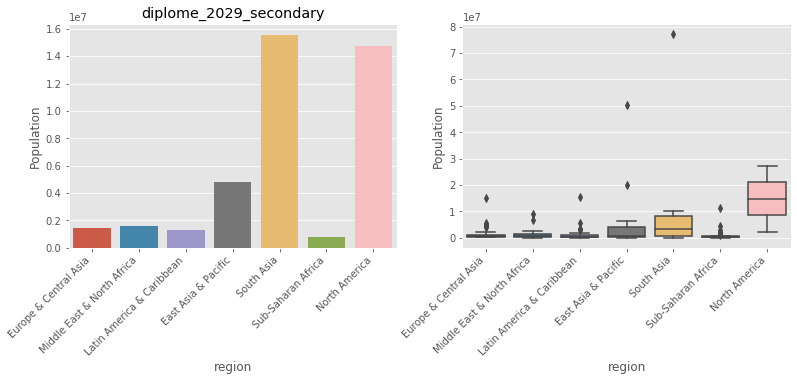

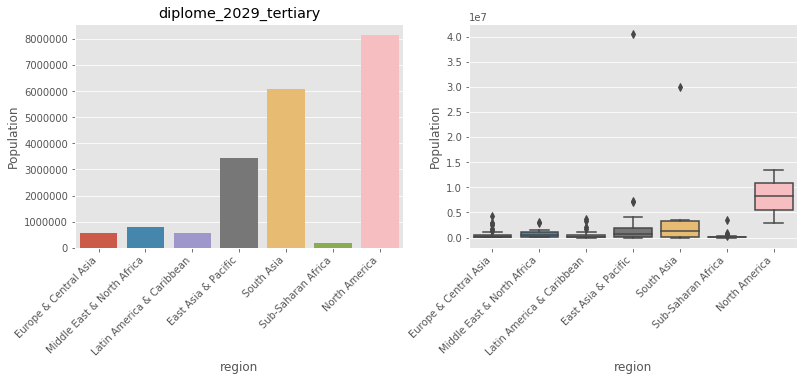

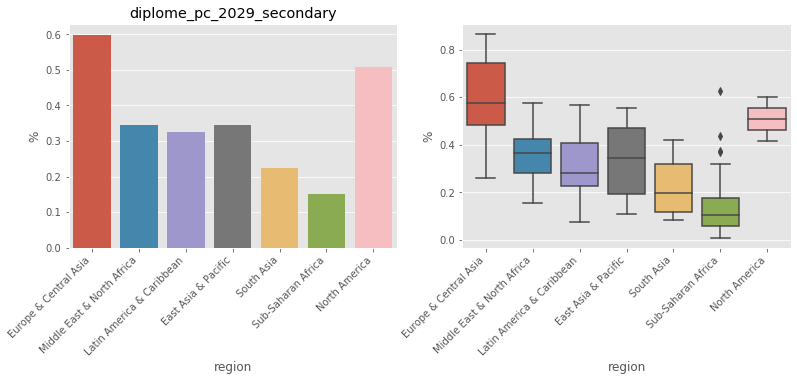

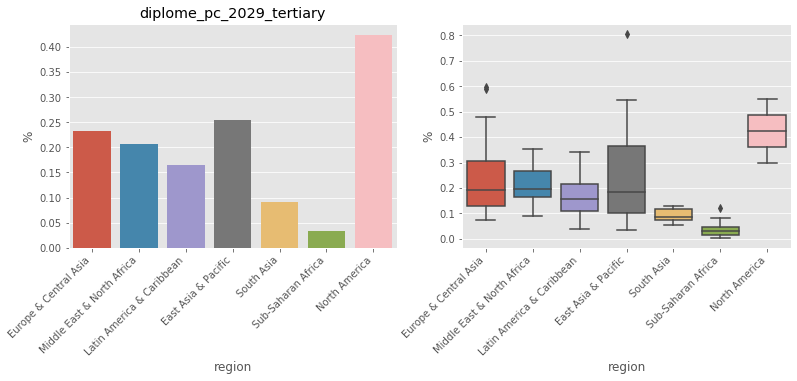

In [96]:
#instruction_obligatoire", "scolarisation_moyenne_2029", "population_secondary", "population_uppersecondary", "diplome_2029_secondary", "diplome_2029_tertiary", "diplome_pc_2029_secondary", "diplome_pc_2029_tertiary"

for indicateur in indicateurs_edu :
    fig = plt.figure(1, figsize=(20,14))
    plt.subplot(331)
    sns.barplot(data = df_filtered_pivot,  x = 'region', y = indicateur, ci= None, order=list_regions)
    plt.title(indicateur)
    plt.xticks(rotation=45, ha="right")
    plt.style.use('ggplot')
    plt.ylabel("Years")

    plt.subplot(332)
    sns.boxplot(data = df_filtered_pivot,  x = 'region', y = indicateur, order=list_regions)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Years")
    plt.show()
    
for indicateur in indicateurs_edu_pop :
    fig = plt.figure(1, figsize=(20,14))
    plt.subplot(331)
    sns.barplot(data = df_filtered_pivot,  x = 'region', y = indicateur, ci= None, order=list_regions)
    plt.title(indicateur)
    plt.xticks(rotation=45, ha="right")
    plt.style.use('ggplot')
    plt.ylabel("Population")

    plt.subplot(332)
    sns.boxplot(data = df_filtered_pivot,  x = 'region', y = indicateur, order=list_regions)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Population")
    plt.show()
    
for indicateur in indicateurs_edu_pc :
    fig = plt.figure(1, figsize=(20,14))
    plt.subplot(331)
    sns.barplot(data = df_filtered_pivot,  x = 'region', y = indicateur, ci= None, order=list_regions)
    plt.title(indicateur)
    plt.xticks(rotation=45, ha="right")
    plt.style.use('ggplot')
    plt.ylabel("%")

    plt.subplot(332)
    sns.boxplot(data = df_filtered_pivot,  x = 'region', y = indicateur, order=list_regions)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("%")
    plt.show()


## 5. Analyse Métier
##### Modele de scoring

Afin de selectioner les pays cibles je decide d'appliquer un modele de scoring en selectionnant 6 indicateurs qui sont importants vis a vis de la problematique.

Pour ce faire j'applique les parametres suivants : 

- Les valeurs sont normalisés
- Un score est calculé par moyenne arithmétique des 5 indicateurs suivants : 
    - Le taux d'acces a internet de la population 
    - La population des 16 a 24 ans
    - Le pourcentage de diplomes du secondaire chez les 20-29 ans.
    - Le pourcentage de diplomes du tertiaire chez les 20-29 ans.
    - Le PIB par habitant

In [47]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()

df_score = df_filtered_pivot[['accessinternet_pc', 'population_1624', 'diplome_pc_2029_secondary', 'diplome_pc_2029_tertiary', 'GDP_capita']] 

df_score_encoded = pd.DataFrame(encoder.fit_transform(df_score), index=df_score.index, columns=df_score.columns)
df_score_encoded["score"] = df_score_encoded.mean(axis=1)


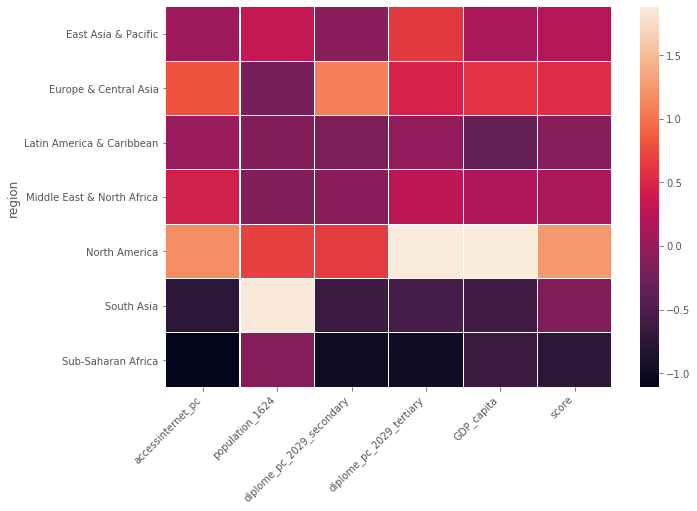

In [109]:

df_index_regions = df_filtered_pivot[["country", "region"]].drop_duplicates()

df_score = pd.concat([df_score_encoded, df_index_regions], axis=1)
df_score = df_score.set_index("country")
df_score_per_region = df_score.groupby("region").mean()

fig = plt.figure(1, figsize=(10, 7))
sns.heatmap(df_score_per_region, square=False, linewidths=0.1)
plt.xticks(rotation=45, ha="right")
plt.show()

L'Europe, l'Asie centrale et l'Amérique du nord connaissent les scores les plus élevés

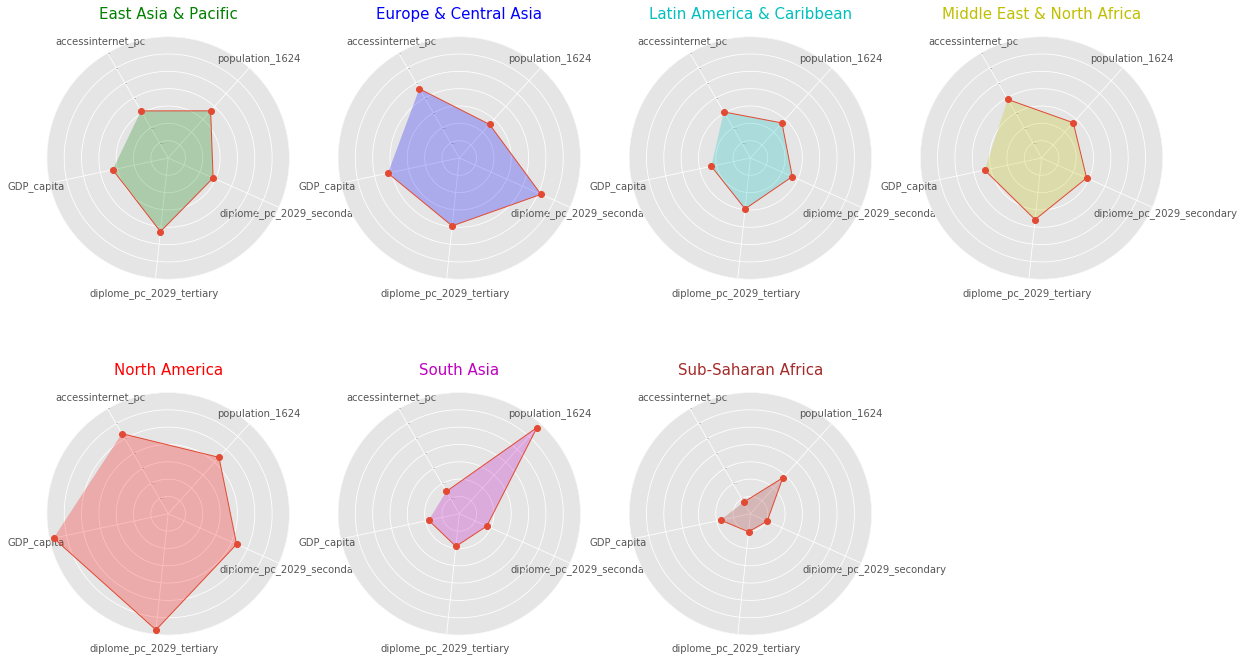

In [49]:
from math import pi

df_plot = df_score_per_region[['accessinternet_pc', 'population_1624', 'diplome_pc_2029_secondary', 'diplome_pc_2029_tertiary', 'GDP_capita']]

# number of variable
categories=list(df_plot.columns)
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]

fig = plt.figure(1, figsize=(20,12))
    
colors = ['g', 'blue', 'c', 'y', 'red', 'm','brown']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(2,4,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1)
    ax.fill(angles, values, colors[i], alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories)
    ax.set_title(region, size=15, color=colors[i])
    ax.grid(True)
    plt.ylim(-1.5,2)

plt.show()

Via cette etude on peut conclure que les regions avec la plus grande aire graphique sont celles qui ont le plus fort potentiel.

De ce fait L'afrique subsaharienne, l'asie du Sud et l'amerique latine semblent être les régions ayant le moins de potentiel client.

Nous allons maintenant afficher les 30 pays avec le meilleur score afin d'avoir une liste de pays avec le plus fort potentiel pour l'entreprise.

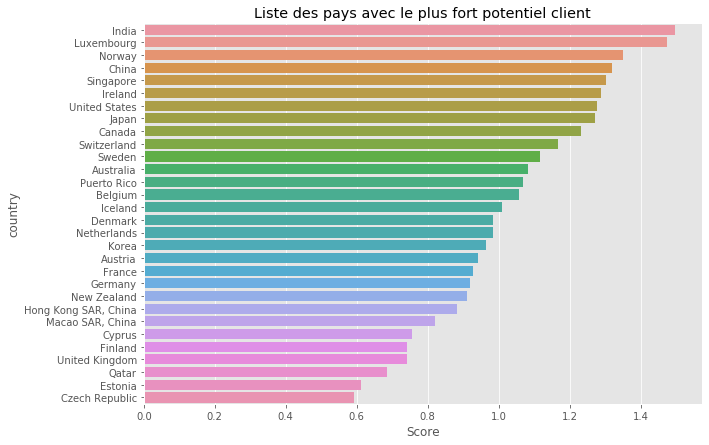

In [110]:
fig = plt.figure(1, figsize=(10, 7))
list_priority_countries = df_score["score"].sort_values(ascending=False)[0:30]
sns.barplot(list_priority_countries.values, list_priority_countries.index, orient='h')
plt.xlabel("Score")
plt.title("Liste des pays avec le plus fort potentiel client")
plt.show()

Etudions maintenant les 10 premiers pays plus en detail afin de connaitre leur caracteristiques et la cible potentielle 

In [51]:
df_score_top10 = df_score.loc[["India","Luxembourg","Norway","China","Singapore","Ireland","United States","Japan","Canada","Switzerland"]]
df_score_top10.describe()

,accessinternet_pc,population_1624,diplome_pc_2029_secondary,diplome_pc_2029_tertiary,GDP_capita,score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.013161,1.709672,0.204467,1.571133,2.092489,1.318184
std,0.806778,3.602784,0.723392,1.629800,1.699254,0.101690
min,-0.815175,-0.283227,-0.881614,-0.274073,-0.640130,1.166669
25%,0.961466,-0.259962,-0.195668,0.234448,1.718814,1.274165
50%,1.252339,-0.180607,0.238765,0.997230,1.934366,1.295114
75%,1.488787,1.170096,0.444549,2.767974,3.070887,1.342784
max,1.736424,9.346032,1.496333,4.629526,4.780487,1.497916


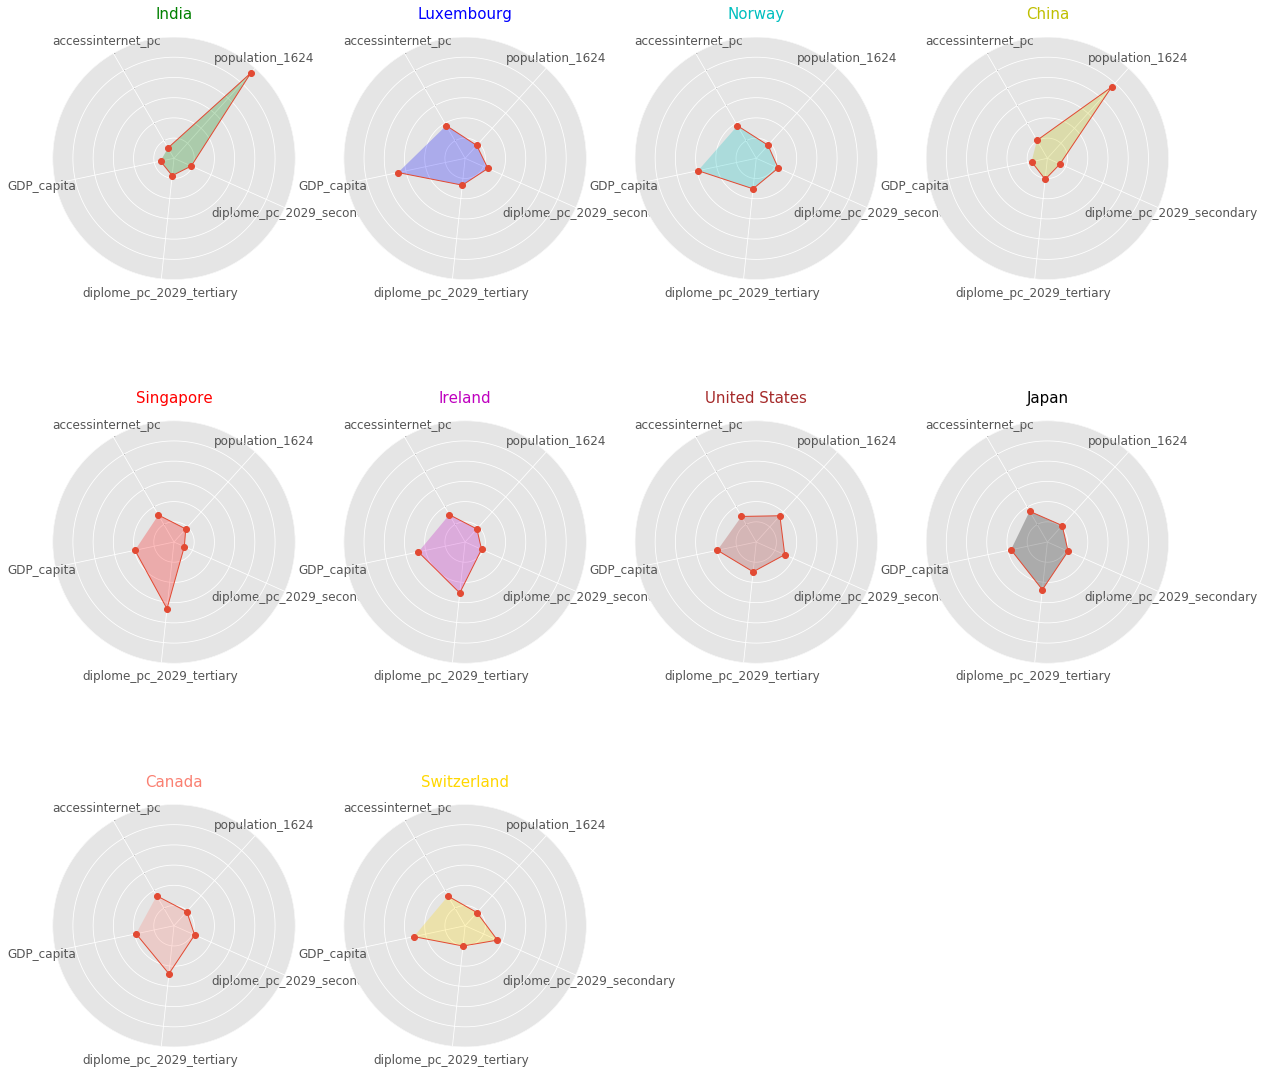

In [112]:
from math import pi

df_score_select = df_score.loc[["India","Luxembourg","Norway","China","Singapore","Ireland","United States","Japan","Canada","Switzerland"]]

df_plot = df_score_select[['accessinternet_pc', 'population_1624', 'diplome_pc_2029_secondary', 'diplome_pc_2029_tertiary', 'GDP_capita']]

# number of variable
categories=list(df_plot.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

fig = plt.figure(1, figsize=(20,20))
    
colors = ['g', 'blue', 'c', 'y', 'red', 'm','brown', 'k', 'salmon', 'gold']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(3,4,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1)
    ax.fill(angles, values, colors[i], alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, size='large')
    ax.set_title(region, size=15, color=colors[i])
    ax.grid(True)
    plt.ylim(-2,10)

plt.show()

- La Chine et l'Inde obtiennent des forts score grace a leur population
- Singapore, L'Irelande, Le Japon ou Le Canade ont un taux de diplomes du tertiaire important 

Nous allons maintenant regarder la cible potentielle que l'on peut toucher sur ces pays.

##### Cible potentielle sur les pays mise en evidence 

In [53]:
top10pays = ["India","Luxembourg","Norway","China","Singapore","Ireland","United States","Japan","Canada","Switzerland"]
mask = df_filtered_pivot["country"].isin(top10pays)
df_filtered_pivot_top10 = df_filtered_pivot[mask]
df_filtered_pivot_top10["cible_potentielle"] = df_filtered_pivot_top10["population_1624"] * df_filtered_pivot_top10["diplome_pc_2029_secondary"] * (df_filtered_pivot_top10["accessinternet_pc"]*0.01) 
df_filtered_pivot_top10

/Users/mariusbiteau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,countrycode,country,region,incomegroup,accessinternet_pc,instruction_obligatoire,population_1624,population_pc_1624,population,scolarisation_moyenne_2029,GDP,GDP_capita,GNI,population_secondary,population_uppersecondary,croissance_population,diplome_2029_secondary,diplome_2029_tertiary,diplome_pc_2029_secondary,diplome_pc_2029_tertiary,cible_potentielle
23,CAN,Canada,North America,High income: OECD,88.470000,10.0,4373511.0,0.121999,3.584861e+07,14.10,1.796369e+12,50109.875276,1.528949e+12,2380616.0,1243512.0,0.851756,2079350.0,2803100.0,0.415,0.550,1.605737e+06
24,CHE,Switzerland,Europe & Central Asia,High income: OECD,87.479056,12.0,959002.0,0.115788,8.282396e+06,12.90,6.333752e+11,76472.459488,6.861449e+11,607100.0,360619.0,1.138337,679970.0,162840.0,0.690,0.170,5.788589e+05
26,CHN,China,East Asia & Pacific,Upper middle income,50.300000,9.0,197026759.0,0.143687,1.371220e+09,9.75,8.908301e+12,6496.624013,1.102288e+13,91333960.0,46531520.0,0.508137,50174340.0,40513030.0,0.225,0.180,2.229850e+07
66,IND,India,South Asia,Lower middle income,26.000000,8.0,244120201.0,0.186486,1.309054e+09,8.30,2.301374e+12,1758.043376,2.065460e+12,175129728.0,99198160.0,1.167527,77253270.0,30062030.0,0.335,0.130,2.126287e+07
67,IRL,Ireland,Europe & Central Asia,High income: OECD,80.122400,10.0,580379.0,0.124097,4.676835e+06,15.10,3.161090e+11,67590.370360,2.261252e+11,278212.0,106850.0,1.282772,193290.0,368740.0,0.315,0.590,1.464793e+05
75,JPN,Japan,East Asia & Pacific,High income: OECD,91.058028,9.0,12157426.0,0.095622,1.271410e+08,14.05,5.986140e+12,47082.688594,4.548953e+12,7039739.0,3591159.0,-0.106125,5228820.0,6981770.0,0.415,0.545,4.594180e+06
88,LUX,Luxembourg,Europe & Central Asia,High income: OECD,97.334100,12.0,65335.0,0.114702,5.696040e+05,12.70,6.131708e+10,107648.608008,3.831127e+10,46127.0,26920.0,2.359951,34240.0,19040.0,0.465,0.260,2.957085e+04
111,NOR,Norway,Europe & Central Asia,High income: OECD,96.810300,10.0,646961.0,0.124689,5.188607e+06,13.55,4.676615e+11,90132.389163,4.060674e+11,386828.0,198378.0,0.995085,313090.0,212820.0,0.445,0.310,2.787146e+05
130,SGP,Singapore,East Asia & Pacific,High income: nonOECD,79.012957,6.0,679106.0,0.122693,5.535002e+06,13.05,2.891739e+11,52244.586492,2.836345e+11,NaN,NaN,1.186377,143770.0,676090.0,0.170,0.805,9.121889e+04
155,USA,United States,North America,High income: OECD,74.554202,12.0,45147517.0,0.140692,3.208966e+08,12.80,1.664039e+13,51855.913480,1.858114e+13,24617058.0,12321350.0,0.729732,27339500.0,13540180.0,0.600,0.300,2.019562e+07


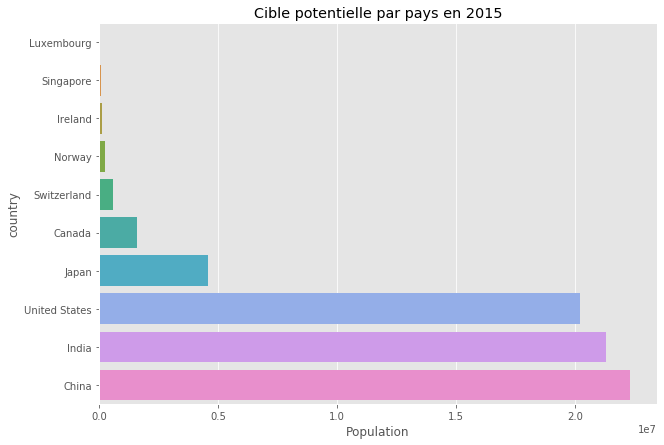

In [65]:
df_filtered_pivot_top10 = df_filtered_pivot_top10.sort_values(by=['cible_potentielle'])
fig = plt.figure(1, figsize=(10, 7))

sns.barplot(df_filtered_pivot_top10["cible_potentielle"], df_filtered_pivot_top10["country"] , orient='h')
plt.xlabel("Population")
plt.title("Cible potentielle par pays en 2015")
plt.show()

In [117]:
df_filtered_pivot_top10_proj = pd.merge(df_filtered_pivot_top10, df_pct_sec, left_on="country", right_on = "Country Name")
df_filtered_pivot_top10_proj['cible_potentielle_proj'] = df_filtered_pivot_top10_proj['cible_potentielle'] * ((df_filtered_pivot_top10_proj['pct_20152030']/ 100)+1)
df_filtered_pivot_top10_proj

,countrycode,country,region,incomegroup,accessinternet_pc,instruction_obligatoire,population_1624,population_pc_1624,population,scolarisation_moyenne_2029,GDP,GDP_capita,GNI,population_secondary,population_uppersecondary,croissance_population,diplome_2029_secondary,diplome_2029_tertiary,diplome_pc_2029_secondary,diplome_pc_2029_tertiary,cible_potentielle,Region,Country Name,Country Code,Indicator Code,2015,2020,2025,2030,pct_20152030,cible_potentielle_proj
0,LUX,Luxembourg,Europe & Central Asia,High income: OECD,97.334100,12.0,65335.0,0.114702,5.696040e+05,12.70,6.131708e+10,107648.608008,3.831127e+10,46127.0,26920.0,2.359951,34240.0,19040.0,0.465,0.260,2.957085e+04,Europe & Central Asia,Luxembourg,LUX,PRJ.POP.2024.3.MF,19.91,22.18,22.70,23.79,19.487695,3.533353e+04
1,SGP,Singapore,East Asia & Pacific,High income: nonOECD,79.012957,6.0,679106.0,0.122693,5.535002e+06,13.05,2.891739e+11,52244.586492,2.836345e+11,NaN,NaN,1.186377,143770.0,676090.0,0.170,0.805,9.121889e+04,East Asia & Pacific,Singapore,SGP,PRJ.POP.2024.3.MF,98.06,100.43,79.24,71.36,-27.228228,6.638161e+04
2,IRL,Ireland,Europe & Central Asia,High income: OECD,80.122400,10.0,580379.0,0.124097,4.676835e+06,15.10,3.161090e+11,67590.370360,2.261252e+11,278212.0,106850.0,1.282772,193290.0,368740.0,0.315,0.590,1.464793e+05,Europe & Central Asia,Ireland,IRL,PRJ.POP.2024.3.MF,121.29,125.58,133.30,155.75,28.411246,1.880959e+05
3,NOR,Norway,Europe & Central Asia,High income: OECD,96.810300,10.0,646961.0,0.124689,5.188607e+06,13.55,4.676615e+11,90132.389163,4.060674e+11,386828.0,198378.0,0.995085,313090.0,212820.0,0.445,0.310,2.787146e+05,Europe & Central Asia,Norway,NOR,PRJ.POP.2024.3.MF,195.12,195.01,190.15,203.03,4.053916,2.900134e+05
4,CHE,Switzerland,Europe & Central Asia,High income: OECD,87.479056,12.0,959002.0,0.115788,8.282396e+06,12.90,6.333752e+11,76472.459488,6.861449e+11,607100.0,360619.0,1.138337,679970.0,162840.0,0.690,0.170,5.788589e+05,Europe & Central Asia,Switzerland,CHE,PRJ.POP.2024.3.MF,378.37,355.04,333.79,345.07,-8.800909,5.279140e+05
5,CAN,Canada,North America,High income: OECD,88.470000,10.0,4373511.0,0.121999,3.584861e+07,14.10,1.796369e+12,50109.875276,1.528949e+12,2380616.0,1243512.0,0.851756,2079350.0,2803100.0,0.415,0.550,1.605737e+06,North America,Canada,CAN,PRJ.POP.2024.3.MF,1327.39,1187.14,1115.79,1194.42,-10.017403,1.444884e+06
6,JPN,Japan,East Asia & Pacific,High income: OECD,91.058028,9.0,12157426.0,0.095622,1.271410e+08,14.05,5.986140e+12,47082.688594,4.548953e+12,7039739.0,3591159.0,-0.106125,5228820.0,6981770.0,0.415,0.545,4.594180e+06,East Asia & Pacific,Japan,JPN,PRJ.POP.2024.3.MF,3075.02,2932.57,2750.17,2613.91,-14.995350,3.905266e+06
7,USA,United States,North America,High income: OECD,74.554202,12.0,45147517.0,0.140692,3.208966e+08,12.80,1.664039e+13,51855.913480,1.858114e+13,24617058.0,12321350.0,0.729732,27339500.0,13540180.0,0.600,0.300,2.019562e+07,North America,United States,USA,PRJ.POP.2024.3.MF,15751.58,14739.11,15620.90,16372.58,3.942462,2.099183e+07
8,IND,India,South Asia,Lower middle income,26.000000,8.0,244120201.0,0.186486,1.309054e+09,8.30,2.301374e+12,1758.043376,2.065460e+12,175129728.0,99198160.0,1.167527,77253270.0,30062030.0,0.335,0.130,2.126287e+07,South Asia,India,IND,PRJ.POP.2024.3.MF,43758.23,48532.20,53070.23,58142.17,32.871394,2.825227e+07
9,CHN,China,East Asia & Pacific,Upper middle income,50.300000,9.0,197026759.0,0.143687,1.371220e+09,9.75,8.908301e+12,6496.624013,1.102288e+13,91333960.0,46531520.0,0.508137,50174340.0,40513030.0,0.225,0.180,2.229850e+07,East Asia & Pacific,China,CHN,PRJ.POP.2024.3.MF,24244.15,24050.10,23004.50,23851.80,-1.618329,2.193764e+07


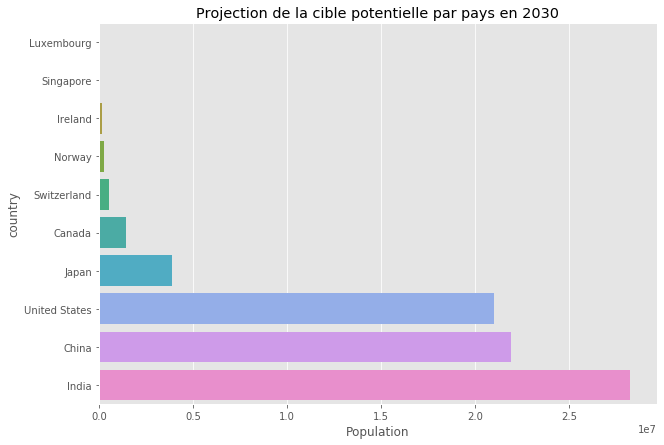

In [119]:
df_filtered_pivot_top10_proj = df_filtered_pivot_top10_proj.sort_values(by=['cible_potentielle_proj'])
fig = plt.figure(1, figsize=(10, 7))

sns.barplot(df_filtered_pivot_top10_proj["cible_potentielle_proj"], df_filtered_pivot_top10_proj["country"] , orient='h')
plt.xlabel("Population")
plt.title("Projection de la cible potentielle par pays en 2030")
plt.show()

Pour determiner la cible potentielle de nos services je ne m'interesse qu'a la population des 16-24 ans ayant acces a internet et etant diplome du secondaire. 

On voit que l'acces a internet et le taux de personnes diplomes du secondaire sont les points faibles de l'inde et de la chine et une fois applique reduisent la cible potentielle au meme niveau que les etats unis. 

Je vais donc maintenant m'interesser a l'evolution de ces indicateurs a un horizon de 15 ans. 

##### Projection 1990-2015

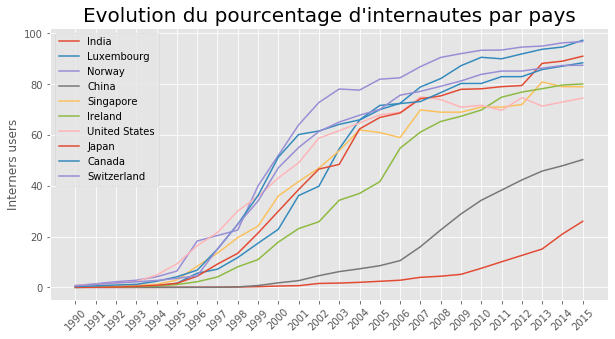

In [55]:

df_it = df_filtered_interpolate[df_filtered_interpolate["Indicator Code"] == "IT.NET.USER.P2"]

fig = plt.figure(1, figsize=(10,5))
series = df_it.groupby("Country Name").mean()
for country in top10pays:
    plt.plot(series.loc[country, :], label=country)
plt.xticks(rotation=45)
plt.ylabel("Interners users")
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.legend()
plt.show()

- Tous les pays hors Chine et Inde ont eu une forte hausse lors du boom d'internet dans les annees 2000 et crois maintenant lentement
- La Chine et l'Inde ont commence leur hausse plus tard et ont donc du retard mais ont une hausse par annee plus importante

##### Projection 2015-2030

/Users/mariusbiteau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


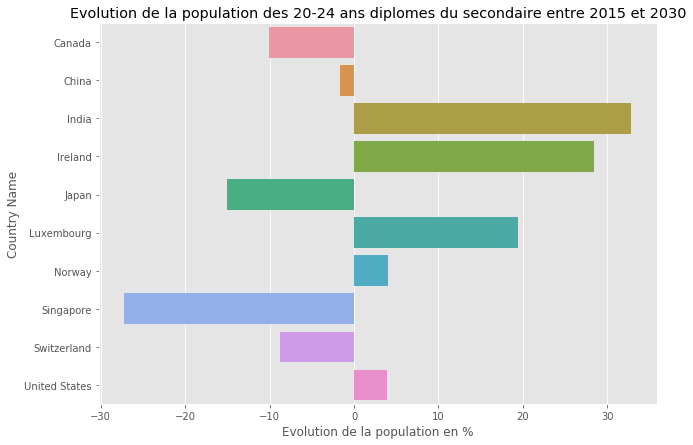

In [66]:
top10pays = ["India","Luxembourg","Norway","China","Singapore","Ireland","United States","Japan","Canada","Switzerland"]
df_pct_sec = df_filtered_proj[df_filtered_proj["Indicator Code"] == "PRJ.POP.2024.3.MF"]
df_pct_sec['pct_20152030'] = df_pct_sec[['2015', '2030']].apply(lambda row: ((row.iloc[1]-row.iloc[0])/row.iloc[0])*100, axis=1)

mask = df_pct_sec["Country Name"].isin(top10pays)
df_pct_sec = df_pct_sec[mask]

fig = plt.figure(1, figsize=(10, 7))

sns.barplot(df_pct_sec['pct_20152030'], df_pct_sec['Country Name'], orient='h')
plt.xlabel("Evolution de la population en %")
plt.title("Evolution de la population des 20-24 ans diplomes du secondaire entre 2015 et 2030")
plt.show()


/Users/mariusbiteau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariusbiteau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


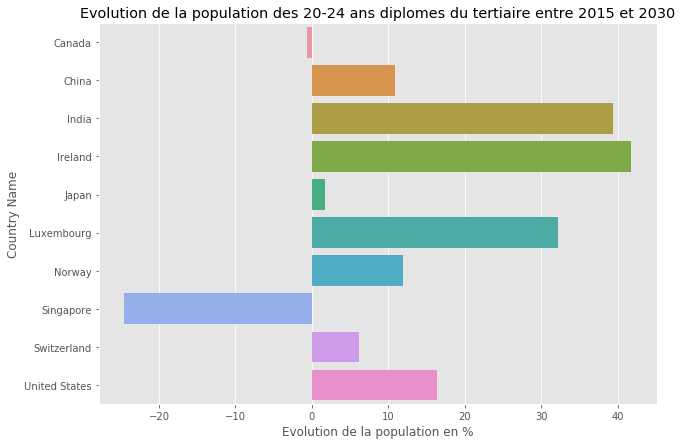

In [68]:
top10pays = ["India","Luxembourg","Norway","China","Singapore","Ireland","United States","Japan","Canada","Switzerland"]
df_pct_ter = df_filtered_proj[df_filtered_proj["Indicator Code"] == "PRJ.POP.2024.4.MF"]
df_pct_ter['pct_20152030'] = df_pct_ter[['2015', '2030']].apply(lambda row: ((row.iloc[1]-row.iloc[0])/row.iloc[0])*100, axis=1)

mask = df_pct_ter["Country Name"].isin(top10pays)
df_pct_ter = df_pct_ter[mask]

fig = plt.figure(1, figsize=(10, 7))

sns.barplot(df_pct_ter['pct_20152030'], df_pct_ter['Country Name'], orient='h')
plt.xlabel("Evolution de la population en %")
plt.title("Evolution de la population des 20-24 ans diplomes du tertiaire entre 2015 et 2030")
plt.show()


In [115]:
df_pct_sec

,Region,Country Name,Country Code,Indicator Code,2015,2020,2025,2030,pct_20152030
477,North America,Canada,CAN,PRJ.POP.2024.3.MF,1327.39,1187.14,1115.79,1194.42,-10.017403
525,East Asia & Pacific,China,CHN,PRJ.POP.2024.3.MF,24244.15,24050.10,23004.50,23851.80,-1.618329
901,South Asia,India,IND,PRJ.POP.2024.3.MF,43758.23,48532.20,53070.23,58142.17,32.871394
933,Europe & Central Asia,Ireland,IRL,PRJ.POP.2024.3.MF,121.29,125.58,133.30,155.75,28.411246
973,East Asia & Pacific,Japan,JPN,PRJ.POP.2024.3.MF,3075.02,2932.57,2750.17,2613.91,-14.995350
1117,Europe & Central Asia,Luxembourg,LUX,PRJ.POP.2024.3.MF,19.91,22.18,22.70,23.79,19.487695
1365,Europe & Central Asia,Norway,NOR,PRJ.POP.2024.3.MF,195.12,195.01,190.15,203.03,4.053916
1557,East Asia & Pacific,Singapore,SGP,PRJ.POP.2024.3.MF,98.06,100.43,79.24,71.36,-27.228228
1701,Europe & Central Asia,Switzerland,CHE,PRJ.POP.2024.3.MF,378.37,355.04,333.79,345.07,-8.800909
1845,North America,United States,USA,PRJ.POP.2024.3.MF,15751.58,14739.11,15620.90,16372.58,3.942462


On peut donc conclure avec l'analyse ci dessus les points suivants : 

- l'Inde et la Chine sont des pays qui vont developper un fort potentielle de clients dans les 15 prochaines annees 

- Les Etats unis sont un marche tres interessant de par leur population, leur developpement deja acquis et offre un horizon a 15-30 en croissance sur le nombre de personnes diplomes du tertaire et du secondaire.

- L'Irelande est un pays avec une population de 15-30 a 60% diplome du secondaire et qui offre aussi des bonnes perspectives d'avenir 

- Singapore a une plus faible population et donc cible potentielle cependant c'est une ville avec un fort acces a internet une population qui fait a 80% d'etudes superieur, cependant du a leur faible taux de natalite la croissance de la cible potentielle a horizon 15 ans n'est pas bonne.
